In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

### READING DATA

In [2]:
data1 = pd.read_csv('application_data.csv')
data2 = pd.read_csv('previous_application.csv')
data1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
data2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data1.shape

(307511, 122)

In [5]:
data2.shape

(1670214, 37)

### UNDERSTANDING DATA 1 & CLEANING

In [6]:
data1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# viewing %of null values
P1 = round((100*data1.isna().sum()/len(data1)) , 2)
P1

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [8]:
P1.sum()/len(P1)

24.395901639344263

In [9]:
# We can see above the avg is 24 and lowest % of NA is 19 so we remove all values above 19
data1 = data1.loc[:,data1.isna().mean()<=.19]

### HANDELING MISSING VALUES IN DATA 1

### 1) NAME_TYPE_SUITE

In [10]:
data1['NAME_TYPE_SUITE'].isna().sum()

1292

In [11]:
data1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [12]:
# checking most repeting value 
data1['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [13]:
# filling NA values with Mode
data1['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied' , inplace = True)
data1['NAME_TYPE_SUITE'].isna().sum()

0

### 2) AMT_GOODS_PRICE

In [14]:
data1['AMT_GOODS_PRICE'].isna().sum()

278

In [15]:
data1['AMT_GOODS_PRICE'].isna().value_counts()

False    307233
True        278
Name: AMT_GOODS_PRICE, dtype: int64

In [16]:
# checking Mean Value
data1['AMT_GOODS_PRICE'].mean()

538396.2074288895

In [17]:
# Filling NA with Mean
data1['AMT_GOODS_PRICE'].fillna(value= data1['AMT_GOODS_PRICE'].mean() , inplace=True)
data1['AMT_GOODS_PRICE'].isna().sum()

0

### 3) OBS_30_CNT_SOCIAL_CIRCLE   ,   DEF_30_CNT_SOCIAL_CIRCLE   ,   OBS_60_CNT_SOCIAL_CIRCLE  ,       DEF_60_CNT_SOCIAL_CIRCLE

In [18]:
# Here The % of Missing Values are very Less
# So we Neglect it

### 4) AMT_REQ_CREDIT_BUREAU_HOUR  ,  AMT_REQ_CREDIT_BUREAU_DAY   ,  AMT_REQ_CREDIT_BUREAU_WEEK   ,   AMT_REQ_CREDIT_BUREAU_MON  ,    AMT_REQ_CREDIT_BUREAU_QRT   ,   AMT_REQ_CREDIT_BUREAU_YEAR 

In [19]:
# here the %of NA is same so we fill the NA Values with Mean
data1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value= data1['OBS_30_CNT_SOCIAL_CIRCLE'].mean() , inplace=True)
data1['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

In [20]:
data1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value= data1['AMT_REQ_CREDIT_BUREAU_DAY'].mean() , inplace=True)
data1['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

In [21]:
data1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value= data1['AMT_REQ_CREDIT_BUREAU_WEEK'].mean() , inplace=True)
data1['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

In [22]:
data1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value= data1['AMT_REQ_CREDIT_BUREAU_QRT'].mean() , inplace=True)
data1['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

In [23]:
data1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value= data1['AMT_REQ_CREDIT_BUREAU_MON'].mean() , inplace=True)
data1['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

In [24]:
data1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value= data1['AMT_REQ_CREDIT_BUREAU_YEAR'].mean() , inplace=True)
data1['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

## Checking Data 1 for Null Values

In [25]:
# Rechecking Missing VAlues
round((100*data1.isnull().sum()/len(data1)), 2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

### Checking Datatypes of Data 1

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [27]:
# days should not be in float so change it to int
data1['DAYS_REGISTRATION'] = data1['DAYS_REGISTRATION'].astype(int)
data1['DAYS_REGISTRATION'].dtypes

dtype('int32')

In [28]:
# AMT_REQ_CREDIT_BUREAU_HOUR / AMT_REQ_CREDIT_BUREAU_DAY  / AMT_REQ_CREDIT_BUREAU_WEEK  /  AMT_REQ_CREDIT_BUREAU_MON   / 
# AMT_REQ_CREDIT_BUREAU_QRT  /  AMT_REQ_CREDIT_BUREAU_YEAR Should Not be in Float so Change it to int
   
data1['AMT_REQ_CREDIT_BUREAU_HOUR'] = data1['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)
data1['AMT_REQ_CREDIT_BUREAU_DAY'] = data1['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int)
data1['AMT_REQ_CREDIT_BUREAU_WEEK'] = data1['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int)
data1['AMT_REQ_CREDIT_BUREAU_MON'] = data1['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)
data1['AMT_REQ_CREDIT_BUREAU_QRT'] = data1['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int)
data1['AMT_REQ_CREDIT_BUREAU_YEAR'] = data1['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

In [29]:
data1['AMT_REQ_CREDIT_BUREAU_HOUR'].dtypes

dtype('int32')

In [30]:
data1['AMT_REQ_CREDIT_BUREAU_DAY'].dtypes

dtype('int32')

In [31]:
data1['AMT_REQ_CREDIT_BUREAU_WEEK'].dtypes

dtype('int32')

In [32]:
data1['AMT_REQ_CREDIT_BUREAU_MON'].dtypes

dtype('int32')

In [33]:
data1['AMT_REQ_CREDIT_BUREAU_QRT'].dtypes

dtype('int32')

In [34]:
data1['AMT_REQ_CREDIT_BUREAU_YEAR'].dtypes

dtype('int32')

### Removing Unwanted Columns

In [35]:
# we can clearly see that Flag & Region Columns are Useless
data1.drop(labels=['FLAG_DOCUMENT_2',       
'FLAG_DOCUMENT_3', 
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9' , 
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21',
'FLAG_MOBIL',   
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'FLAG_OWN_REALTY',
'REGION_RATING_CLIENT',
'REGION_RATING_CLIENT_W_CITY',
'REGION_POPULATION_RELATIVE'] , axis = 1 , inplace = True)

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

### Now Checking Gender and Organization Coloumn

In [37]:
data1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [38]:
# As Majority is Female we use XNA as Female
data1.CODE_GENDER.replace(to_replace='XNA' , value='F' , inplace=True)
data1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [39]:
# Checking Organization Coloumn
data1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [40]:
# here a large amount of XNA value present so we have to drop it
data1 = data1.drop(data1.loc[data1['ORGANIZATION_TYPE']=='XNA'].index)
data1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [41]:
### Checking for Imbalance Ratio
data1.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

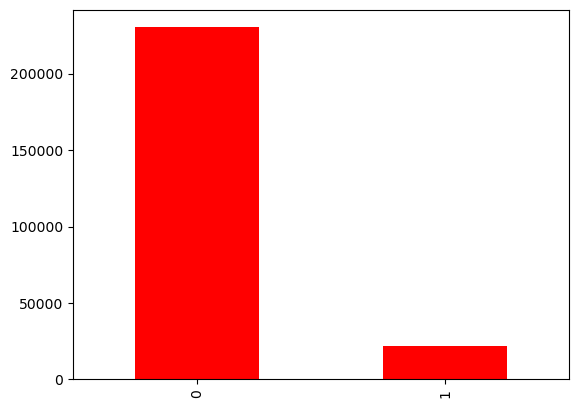

In [42]:
# So Here 0 Means Non-Defaulter and 1 Means Defaulter Peopls
# We can Plot a Graph to View Clearly
data1.TARGET.value_counts().plot.bar(color='Red')
plt.show()

In [43]:
target0 = data1.loc[data1['TARGET']==0]  # for Non-Defaulter
target1 = data1.loc[data1['TARGET']==1]  # for Defaulter

# ⮞  Univarient Analysis

## (1) Plotting for Non Defaulter People.


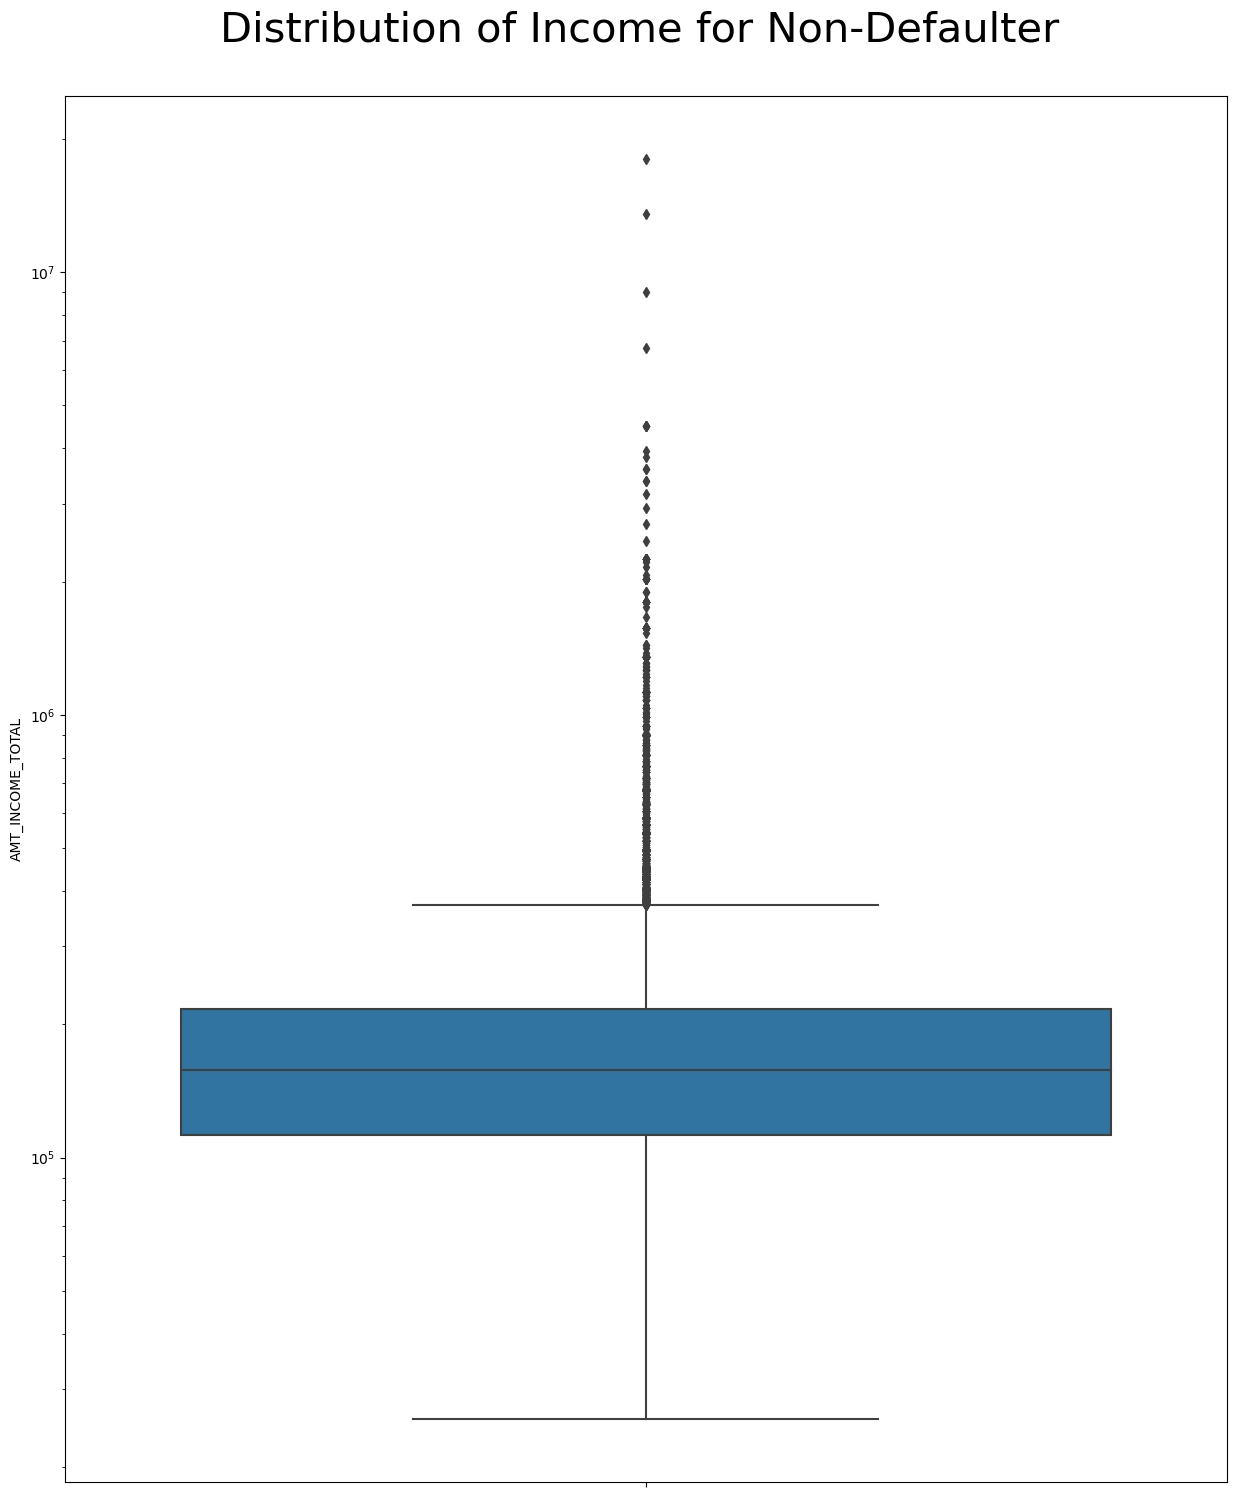

In [44]:
# Distribution of Income
plt.figure(figsize=[15,18])
sns.boxplot(data=target0 , y= 'AMT_INCOME_TOTAL')
plt.title('Distribution of Income for Non-Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### There are some Outliers Present

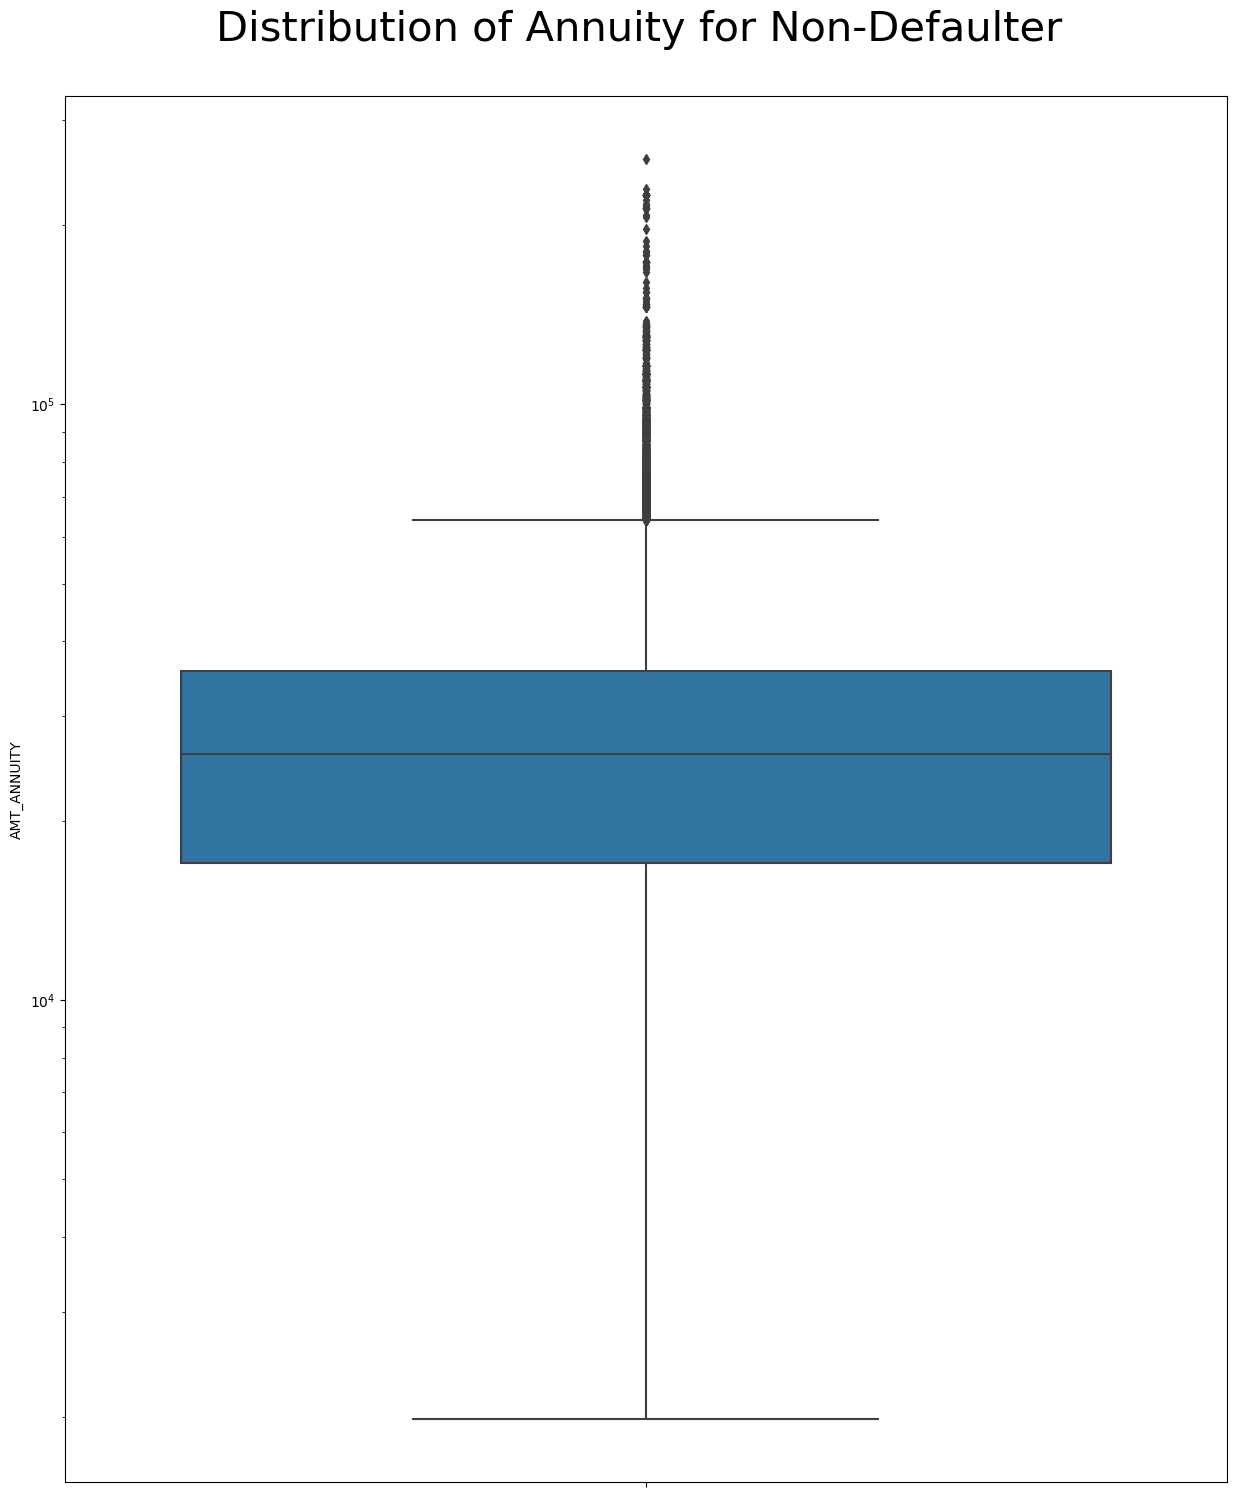

In [45]:
# Distribution of Annuity
plt.figure(figsize=[15,18])
sns.boxplot(data=target0 , y= 'AMT_ANNUITY')
plt.title('Distribution of Annuity for Non-Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) First quirtile is bigger so Most of the Credit Lies in 1st Quartile
#### 2) There are some Outliers Present

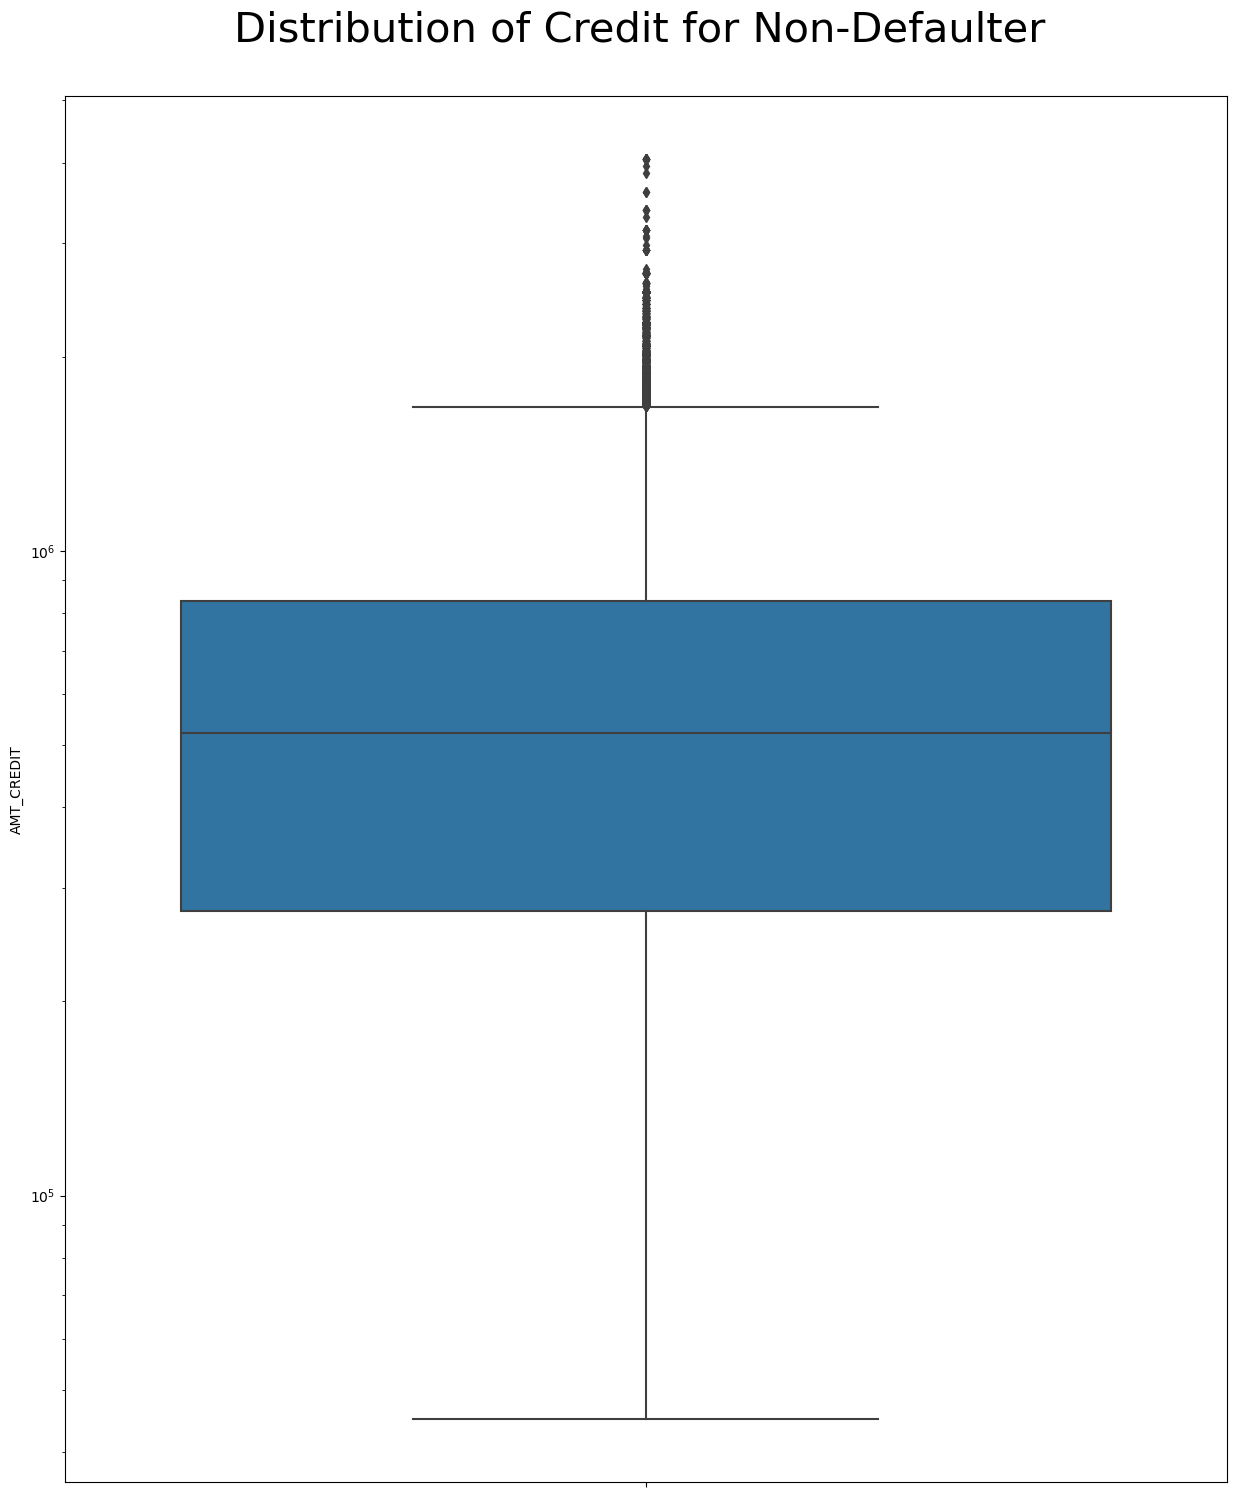

In [46]:
# Distribution of Credit
plt.figure(figsize=[15,18])
sns.boxplot(data=target0 , y= 'AMT_CREDIT')
plt.title('Distribution of Credit for Non-Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) First quirtile is bigger so Most of the Credit Lies in 1st Quartile
#### 2) There are some Outliers Present

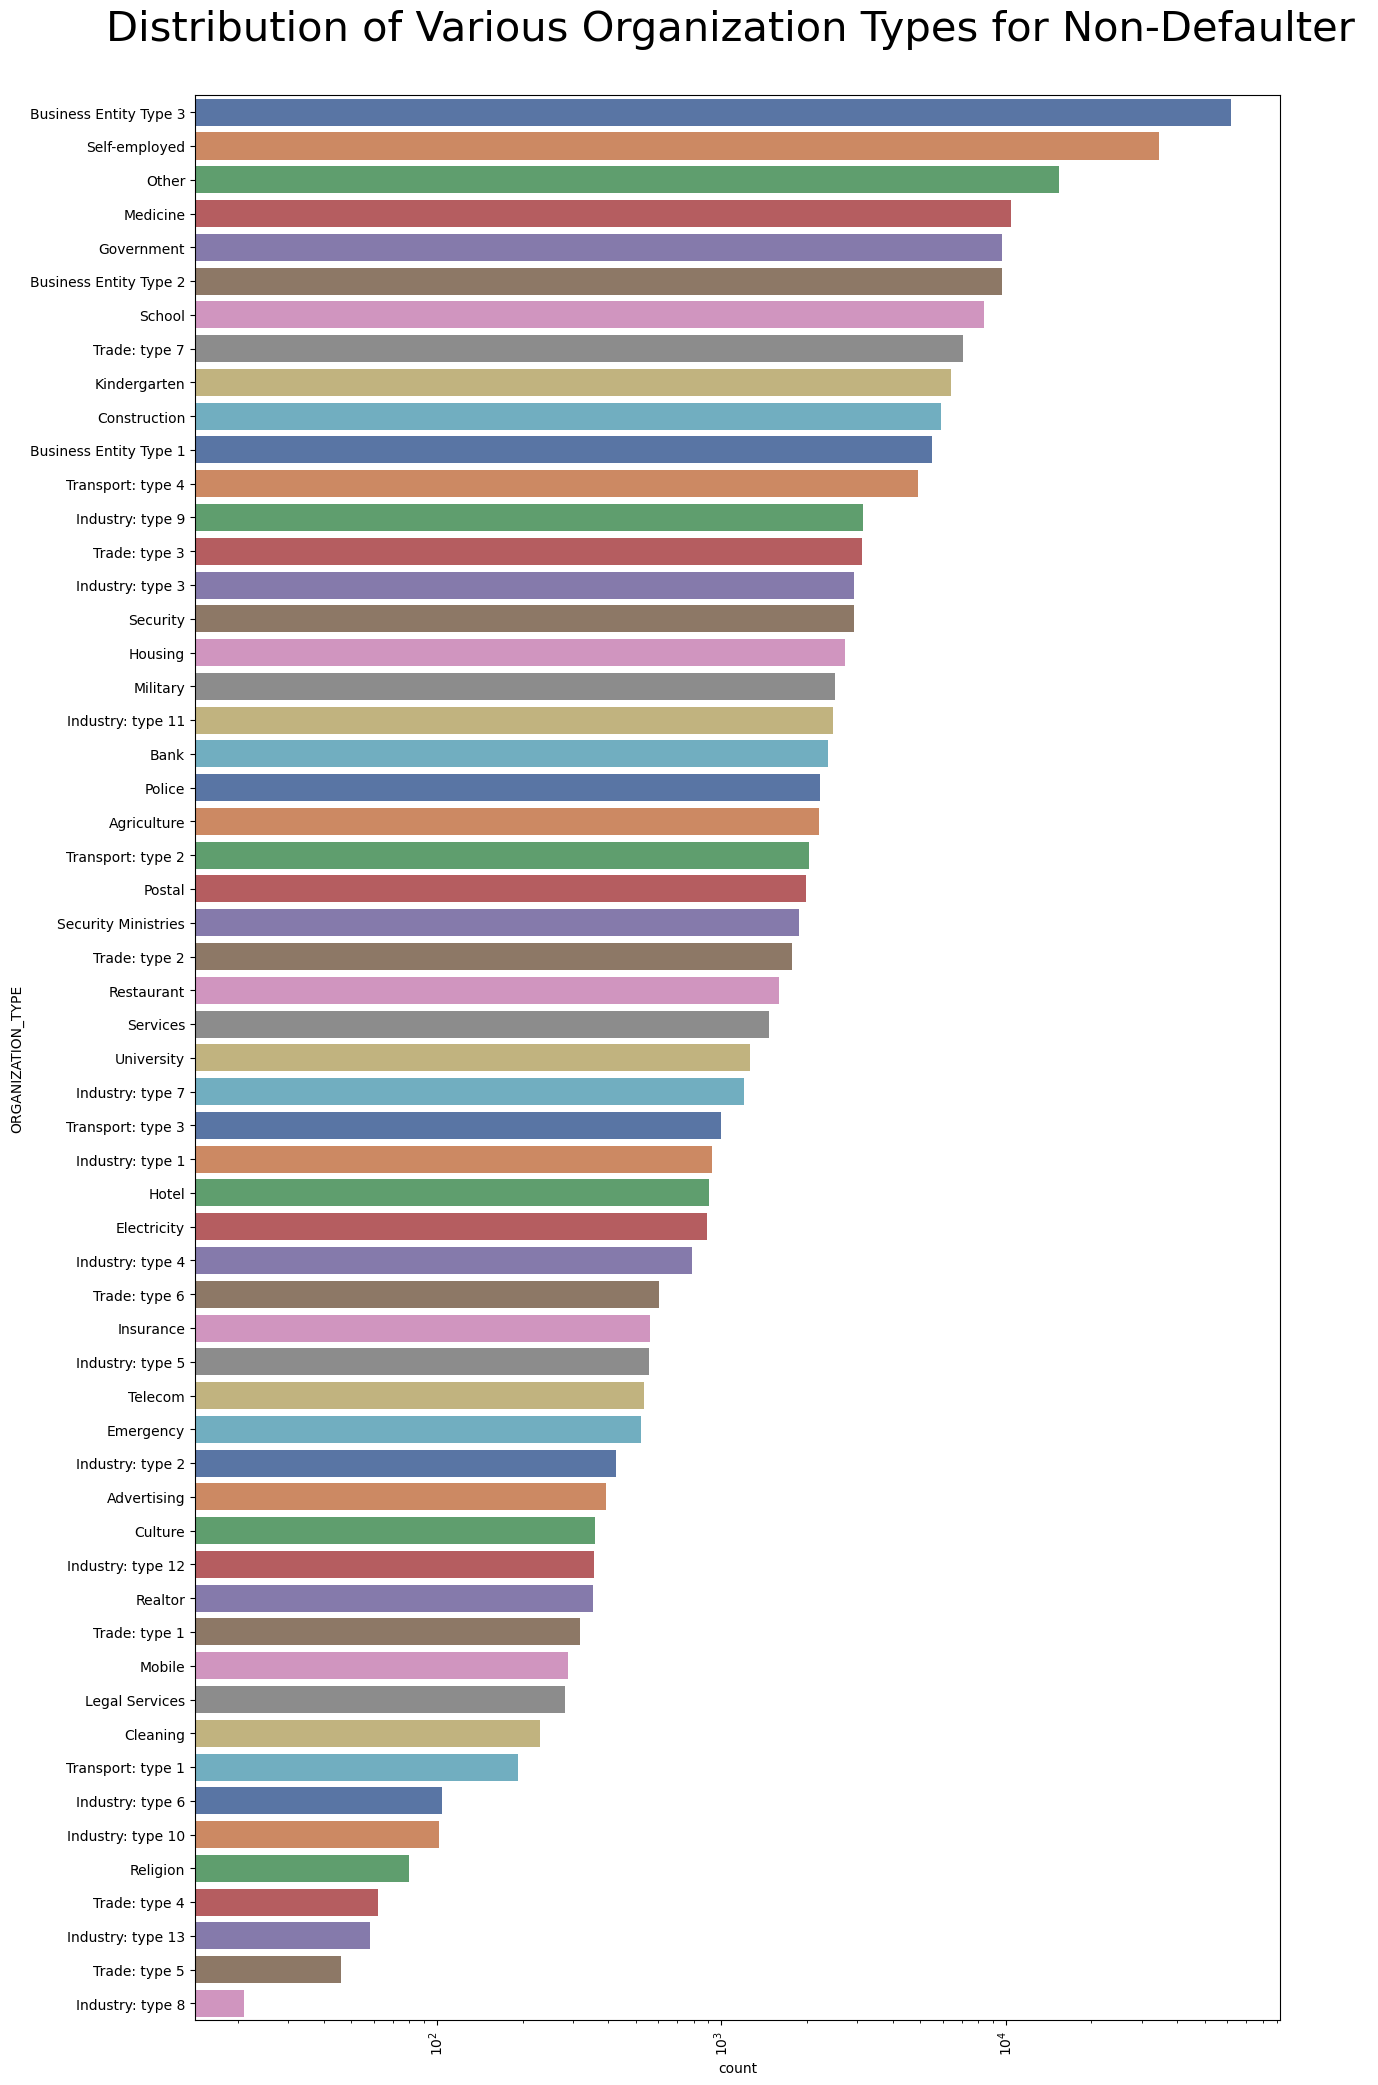

In [47]:
plt.figure(figsize=[14,25])
sns.countplot(data=target0 ,y = 'ORGANIZATION_TYPE' , order=target0['ORGANIZATION_TYPE'].value_counts().index , palette='deep')
plt.title('Distribution of Various Organization Types for Non-Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.xscale('log') 
plt.show()

#### 1) Buissness Entity , Self Employed , Other , and Medicine have applied More for Credit Count. 
#### 2) Industry Type 8 has less Credit Count.

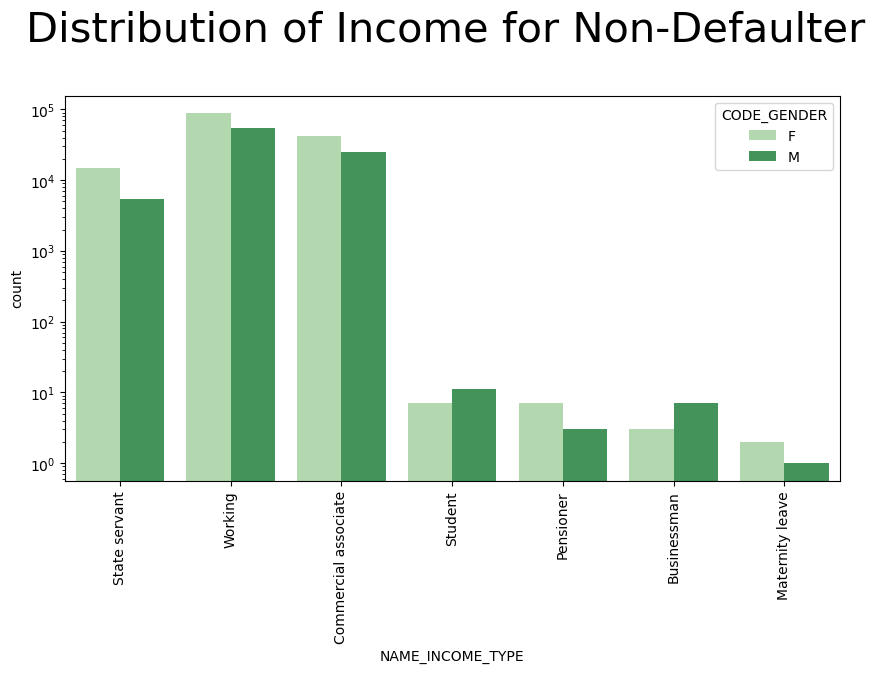

In [48]:
# Ploting Income Type vs Gender
plt.figure(figsize=[10,5])
sns.countplot(data=target0 , x = 'NAME_INCOME_TYPE' , hue='CODE_GENDER' , palette='Greens')
plt.title('Distribution of Income for Non-Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')

#### 1) Working Women has more credit then others. 
#### 2) State servent , Working , Commersial Associate have more credit Count .
#### 3) Man has less credit count in Maternity leave.
#### 4) Only in students and Businessman Male has More credit count then Females. 

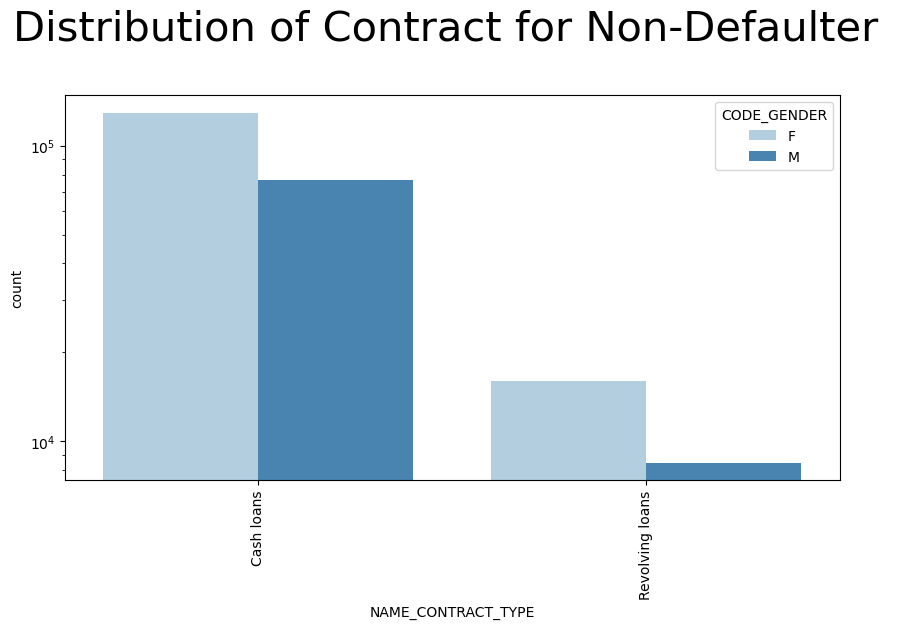

In [49]:
# Ploting Contract Type vs Gender
plt.figure(figsize=[10,5])
sns.countplot(data=target0 , x = 'NAME_CONTRACT_TYPE' , hue='CODE_GENDER' , palette='Blues')
plt.title('Distribution of Contract for Non-Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')

#### 1) Cash Loans have Higher No of Credit Count then Revolving Loans
#### 2) In both the cases Females has more Credit Counts then Males

## (2) Plotting for Defaulter People.

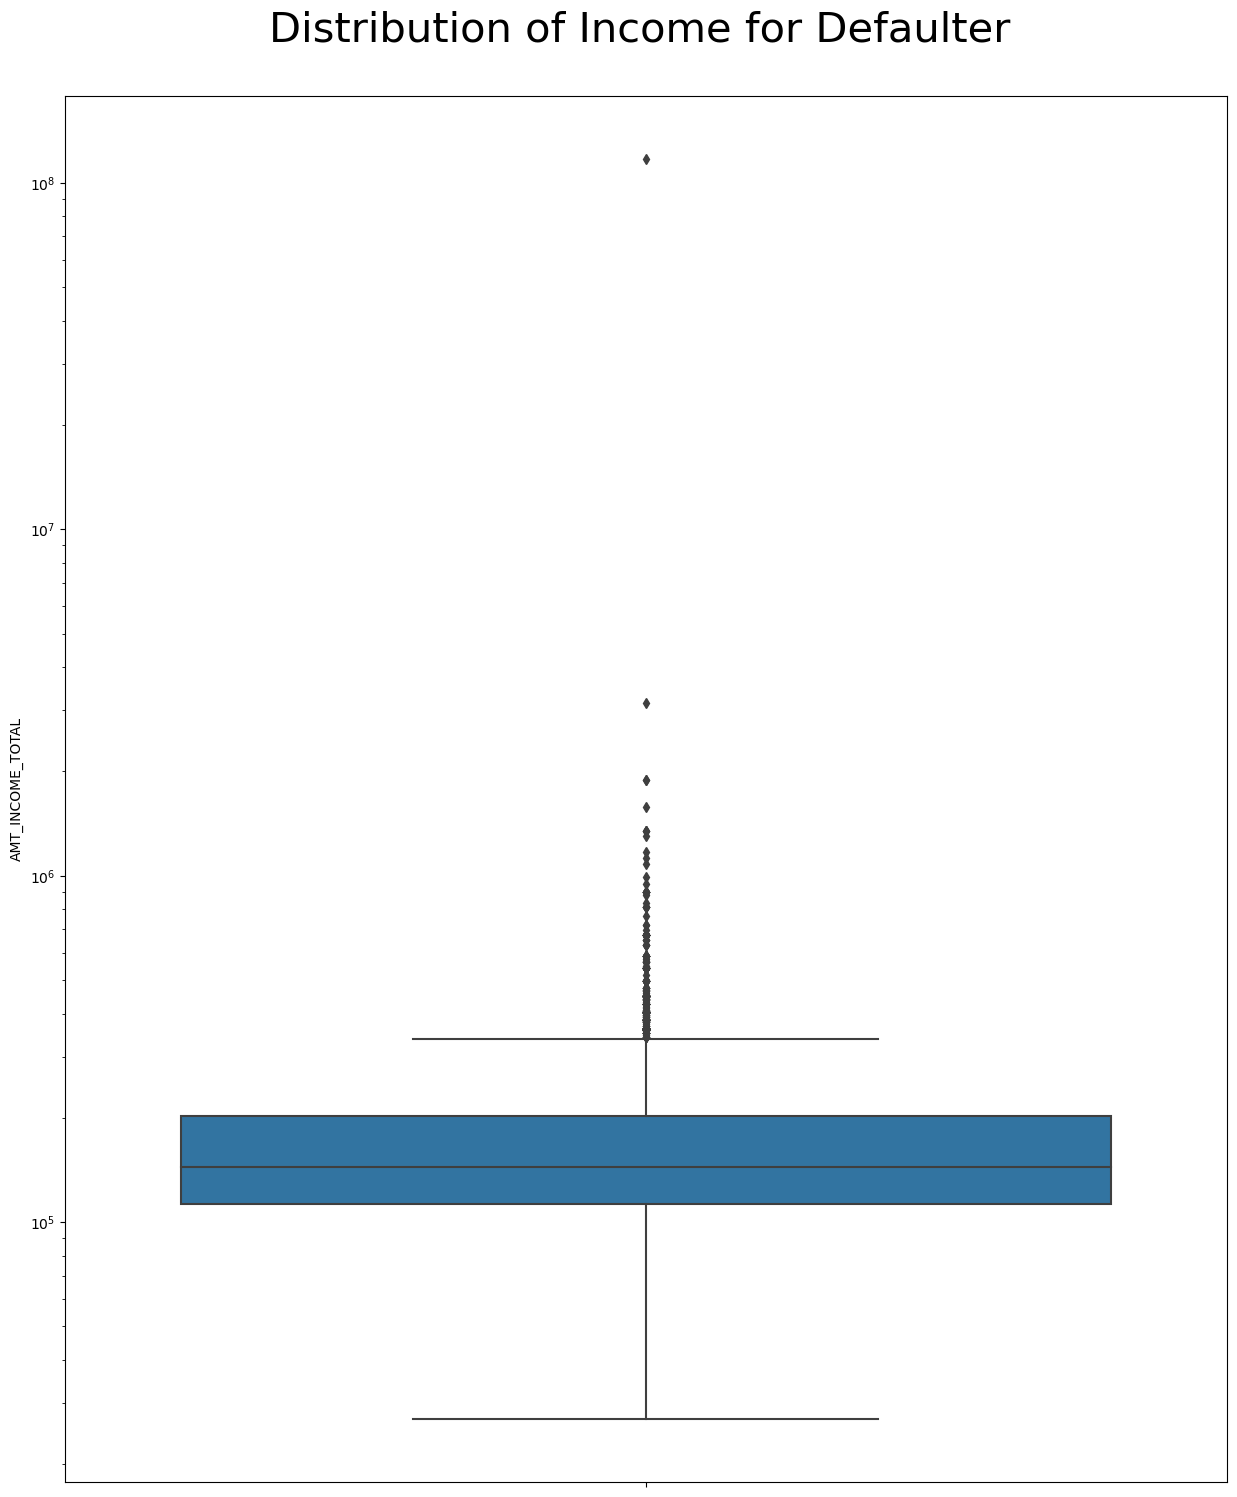

In [50]:
# Distribution of Income
plt.figure(figsize=[15,18])
sns.boxplot(data=target1 , y= 'AMT_INCOME_TOTAL')
plt.title('Distribution of Income for Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### There are some Outliers Present

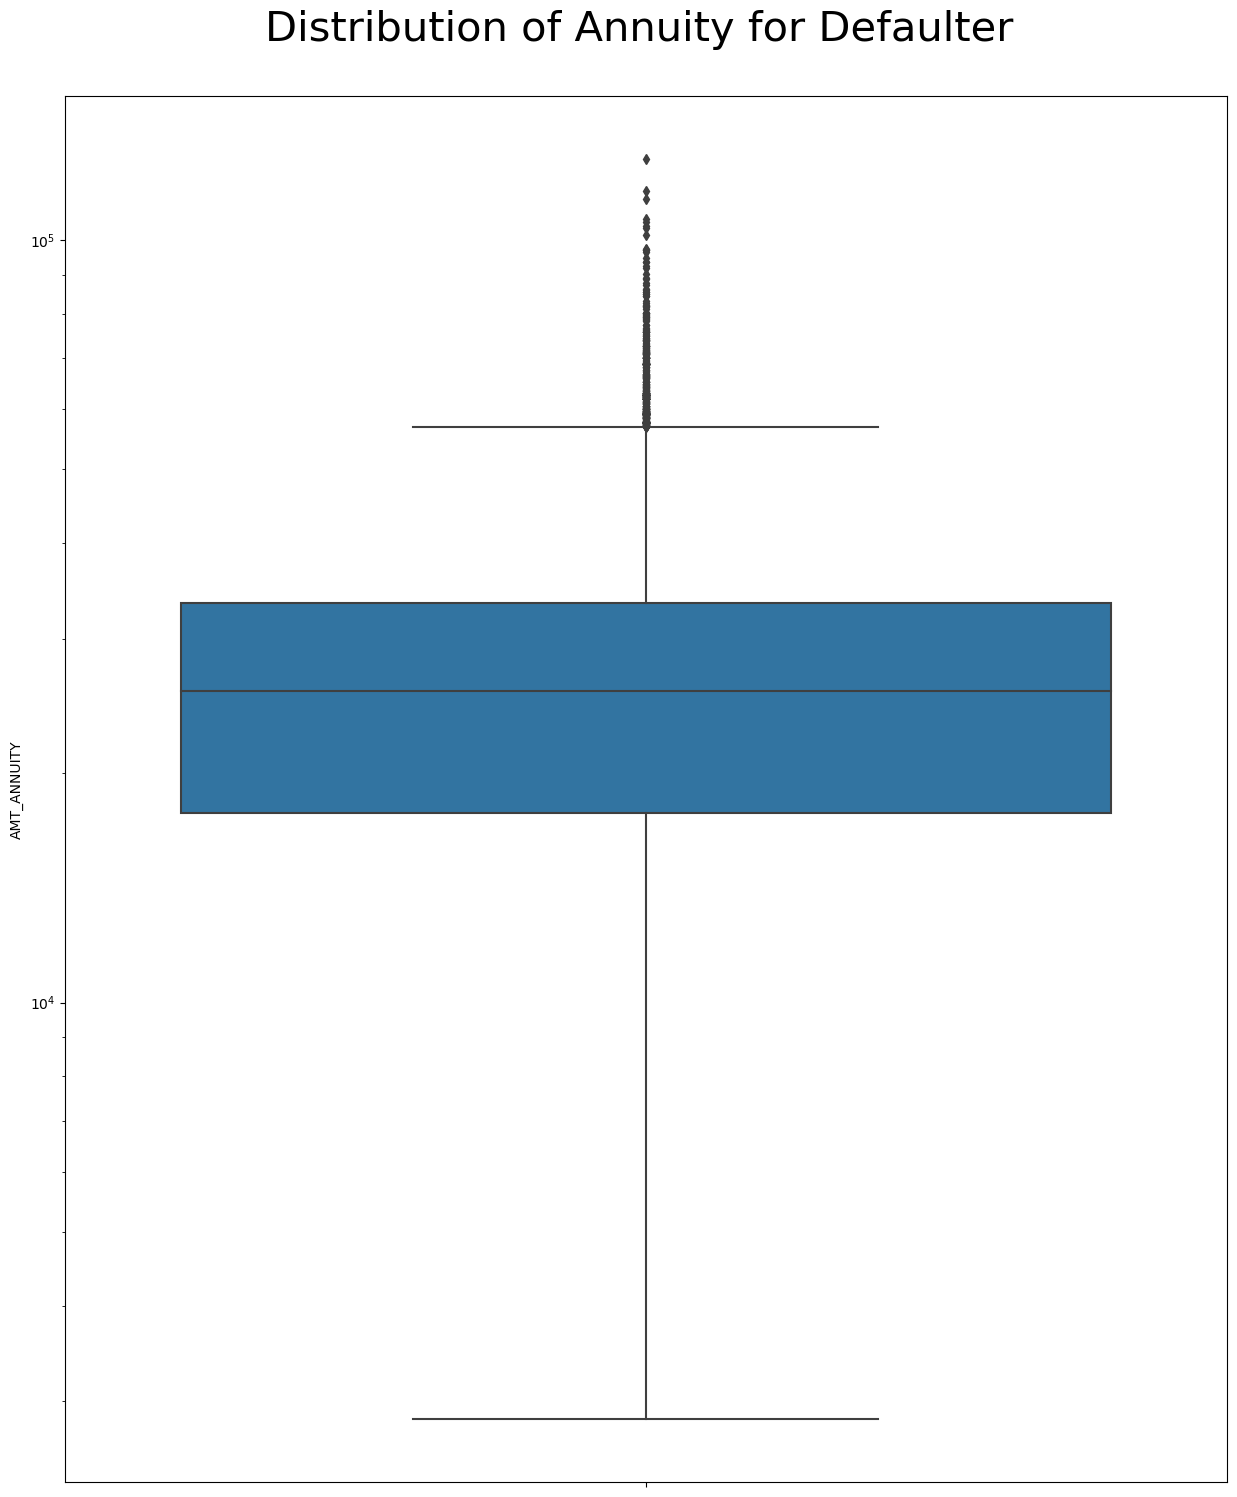

In [51]:
# Distribution of Annuity
plt.figure(figsize=[15,18])
sns.boxplot(data=target1 , y= 'AMT_ANNUITY')
plt.title('Distribution of Annuity for Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) First quirtile is bigger so Most of the Credit Lies in 1st Quartile
#### 2) There are some Outliers Present

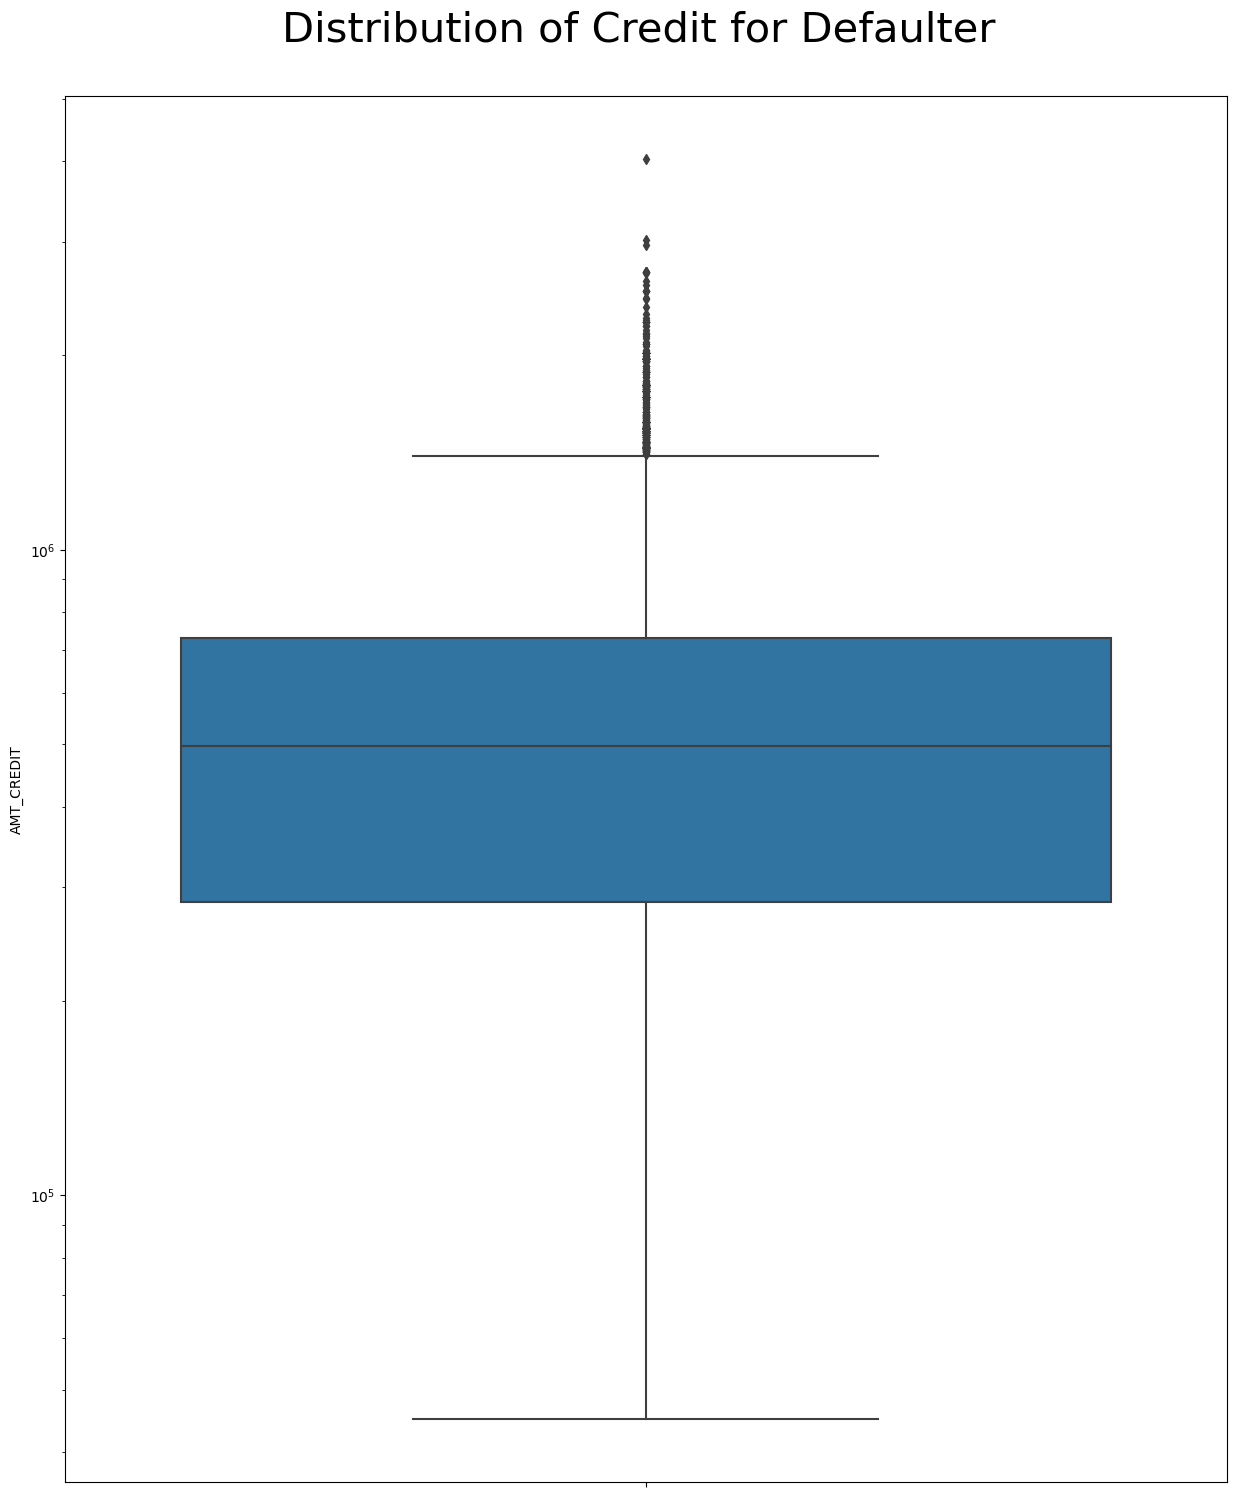

In [52]:
# Distribution of Credit
plt.figure(figsize=[15,18])
sns.boxplot(data=target1 , y= 'AMT_CREDIT')
plt.title('Distribution of Credit for Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) First quirtile is bigger so Most of the Credit Lies in 1st Quartile
#### 2) There are some Outliers Present

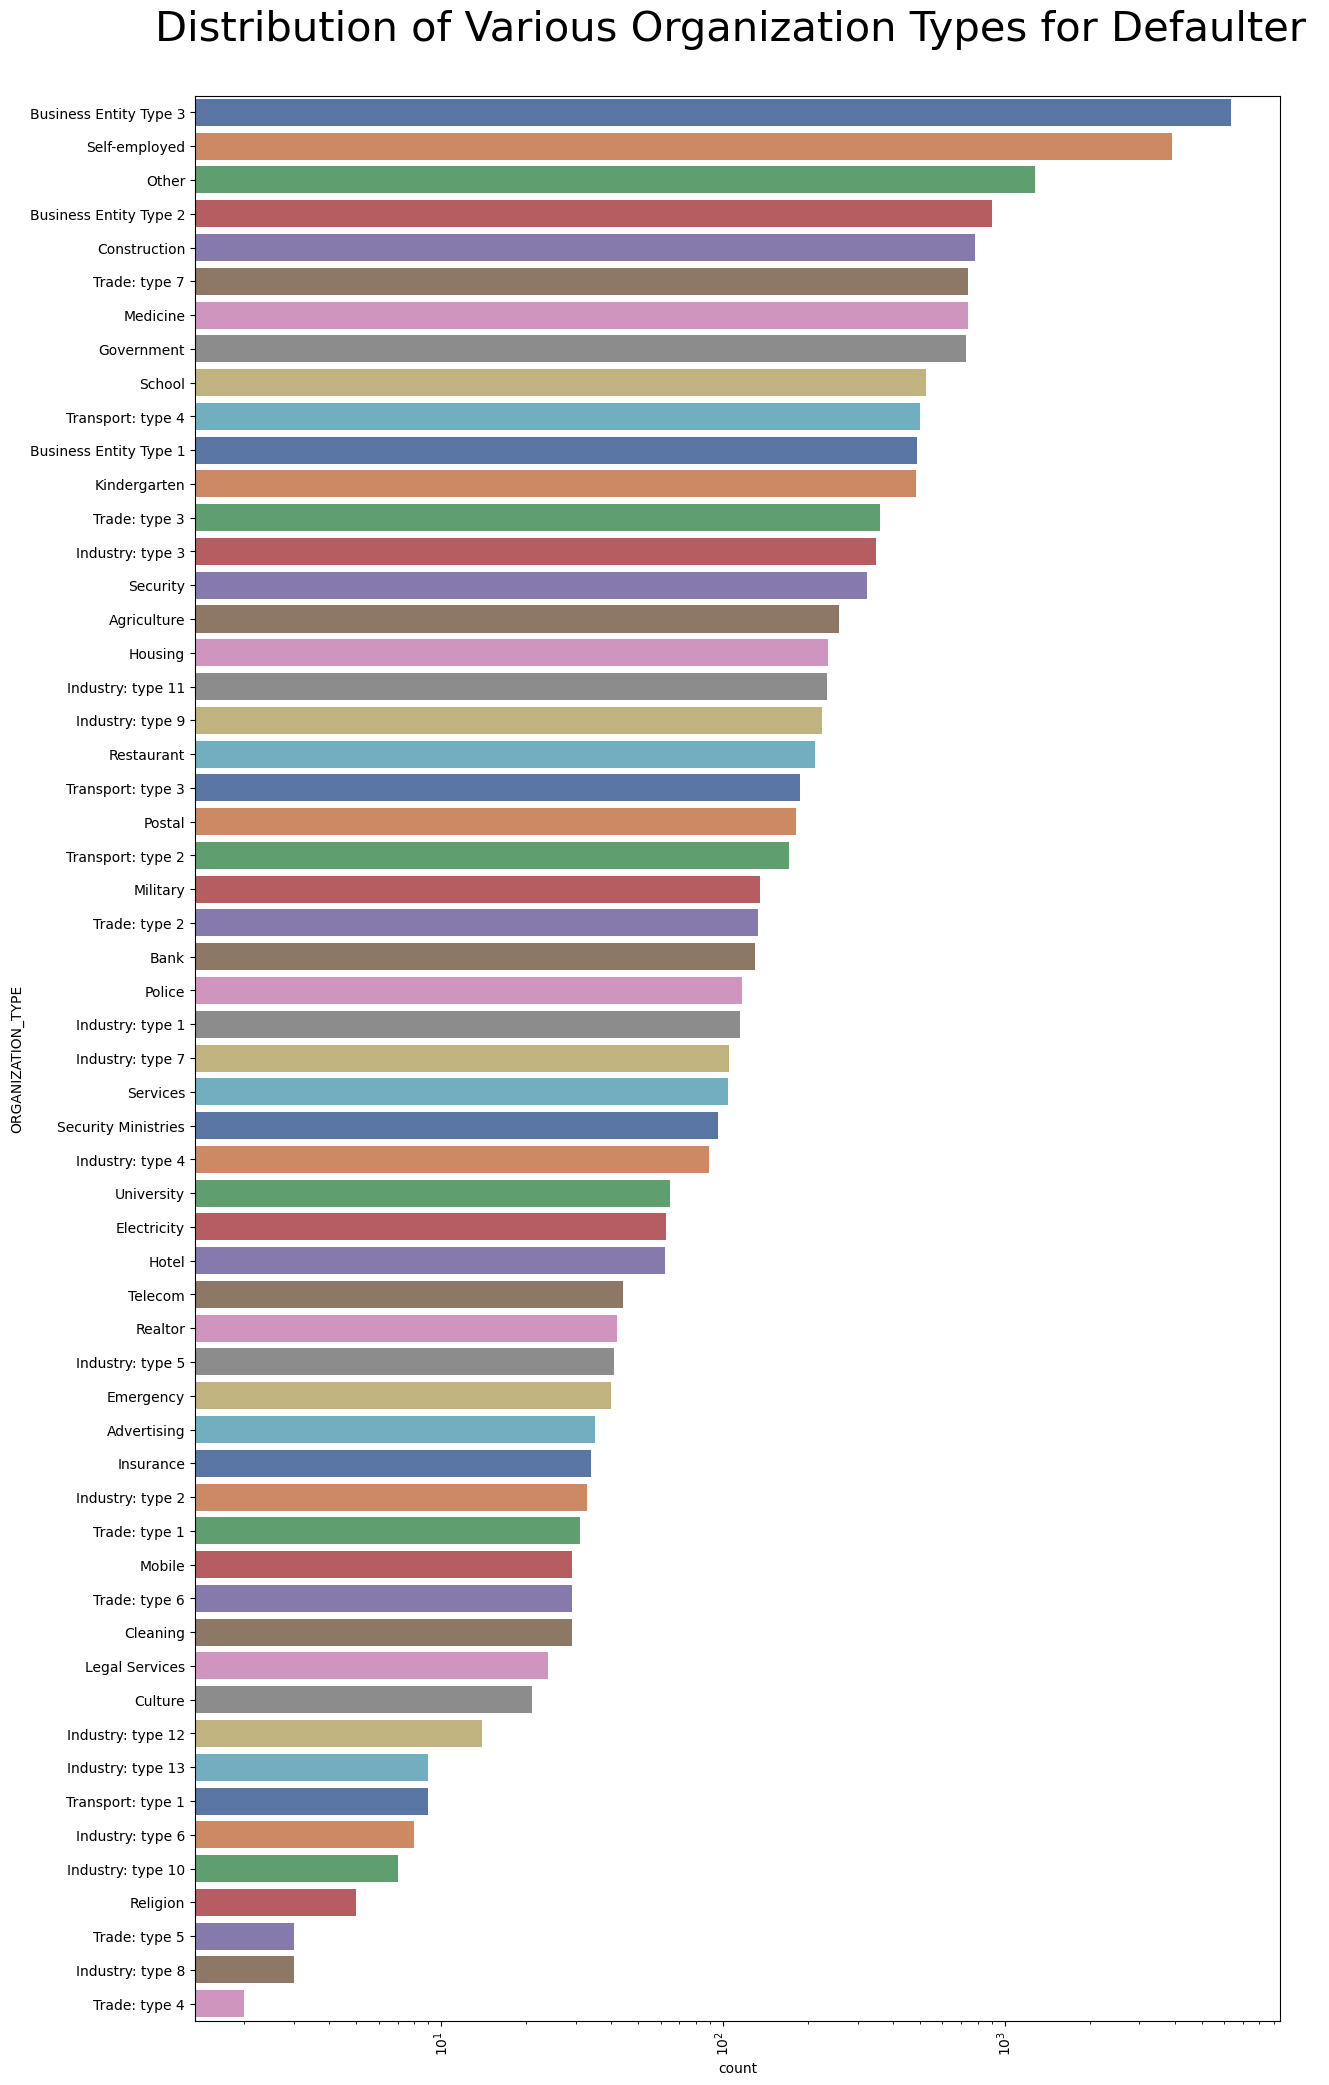

In [53]:
plt.figure(figsize=[14,25])
sns.countplot(data=target1 ,y = 'ORGANIZATION_TYPE' , order=target1['ORGANIZATION_TYPE'].value_counts().index , palette='deep')
plt.title('Distribution of Various Organization Types for Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.xscale('log') 
plt.show()

#### 1) Buissness Entity , Self Employed , Other , and Medicine have applied More for Credit Count. 
#### 2) Industry Type 8 has less Credit Count.

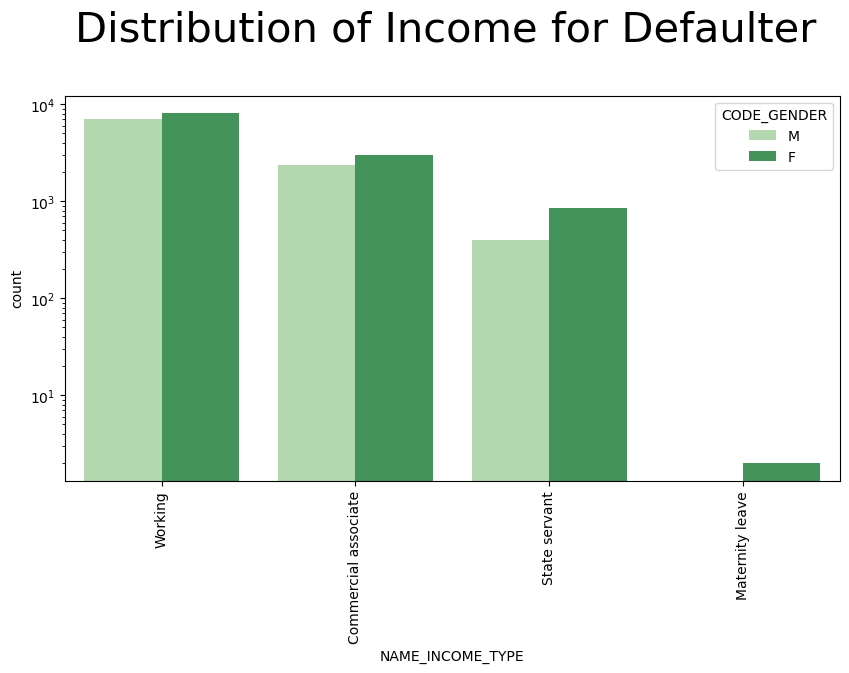

In [54]:
plt.figure(figsize=[10,5])
sns.countplot(data=target1 , x = 'NAME_INCOME_TYPE' , hue='CODE_GENDER' , palette='Greens')
plt.title('Distribution of Income for Defaulter \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')

#### 1) Working Man and Women has more credit then others. 
#### 2) Females are Having More Credit count then Male
#### 2) State servent , Working , Commersial Associate have more credit Count.
#### 3) Maternity leave has less credit count.

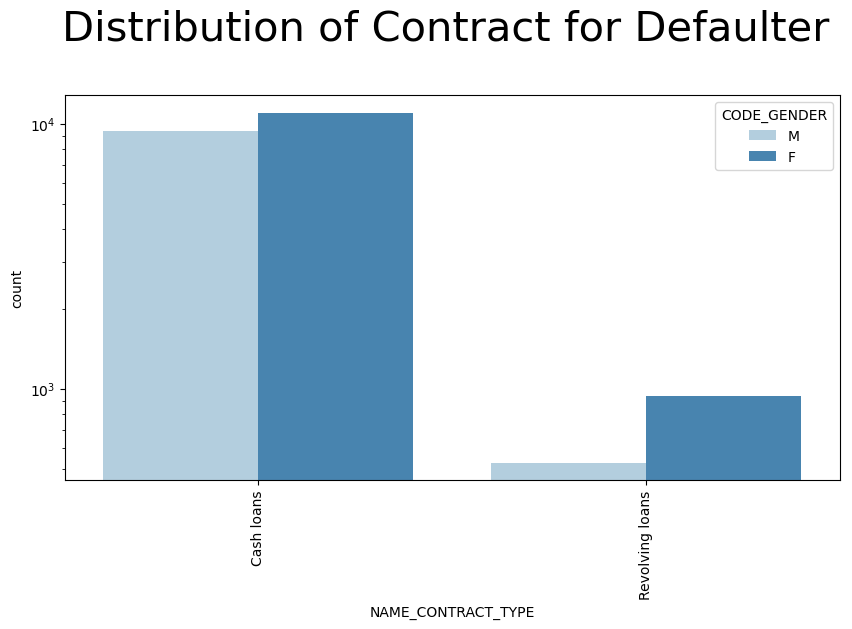

In [55]:
# Ploting Contract Type vs Gender
plt.figure(figsize=[10,5])
sns.countplot(data=target1 , x = 'NAME_CONTRACT_TYPE' , hue='CODE_GENDER' , palette='Blues')
plt.title('Distribution of Contract  \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')

#### 1) Cash Loans have Higher No of Credit Count then Revolving Loans
#### 2) In both the cases Females has more Credit Counts then Males

# ⮞  Bivariate Analysis of Numerical Coloumns

<function matplotlib.pyplot.show(close=None, block=None)>

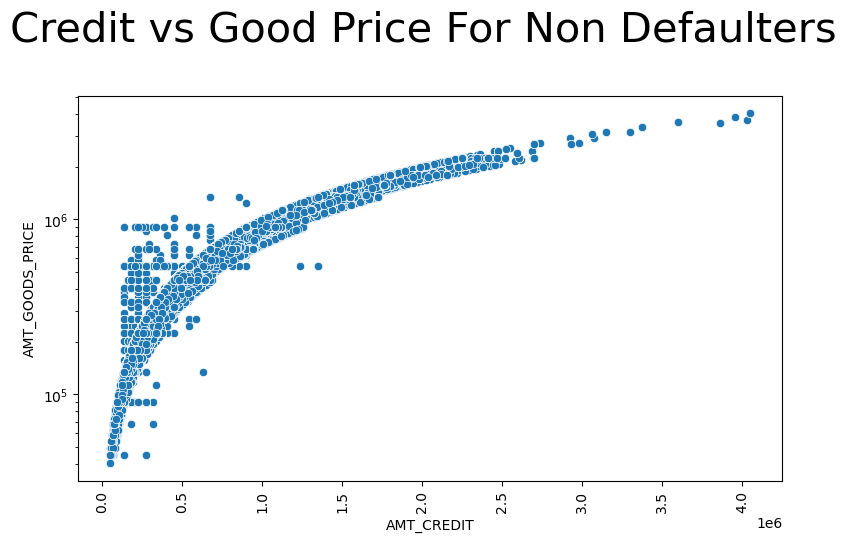

In [56]:
# Plotting Scatter Plot for Correlation
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.scatterplot(target0['AMT_CREDIT'] , target0['AMT_GOODS_PRICE'])
plt.title('Credit vs Good Price For Non Defaulters \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

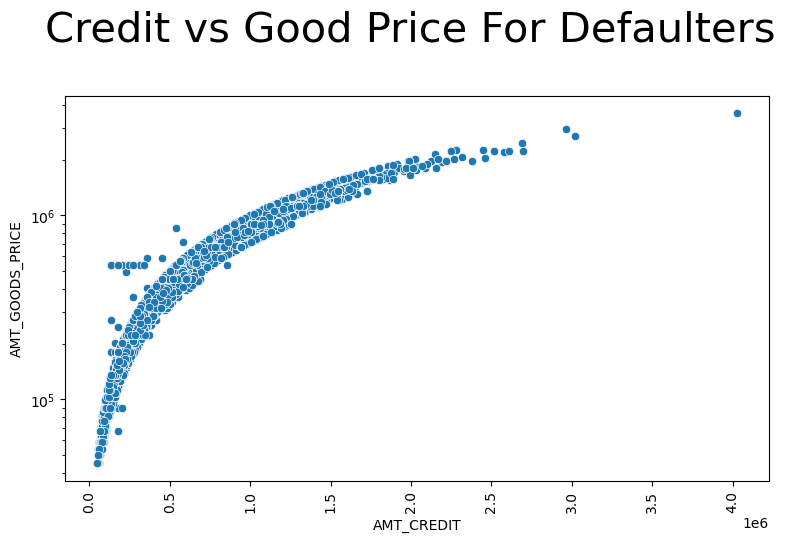

In [72]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.scatterplot(target1['AMT_CREDIT'] , target1['AMT_GOODS_PRICE'])
plt.title('Credit vs Good Price For Defaulters \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show

#### Here we can see that Credit and Good Price are Highly Correlated. So if we Increase/Decrease the Price any one of them both will Increase/Decrease.

# ⮞  Multivariate Analysis

## (1)  For Non-Defaulter People

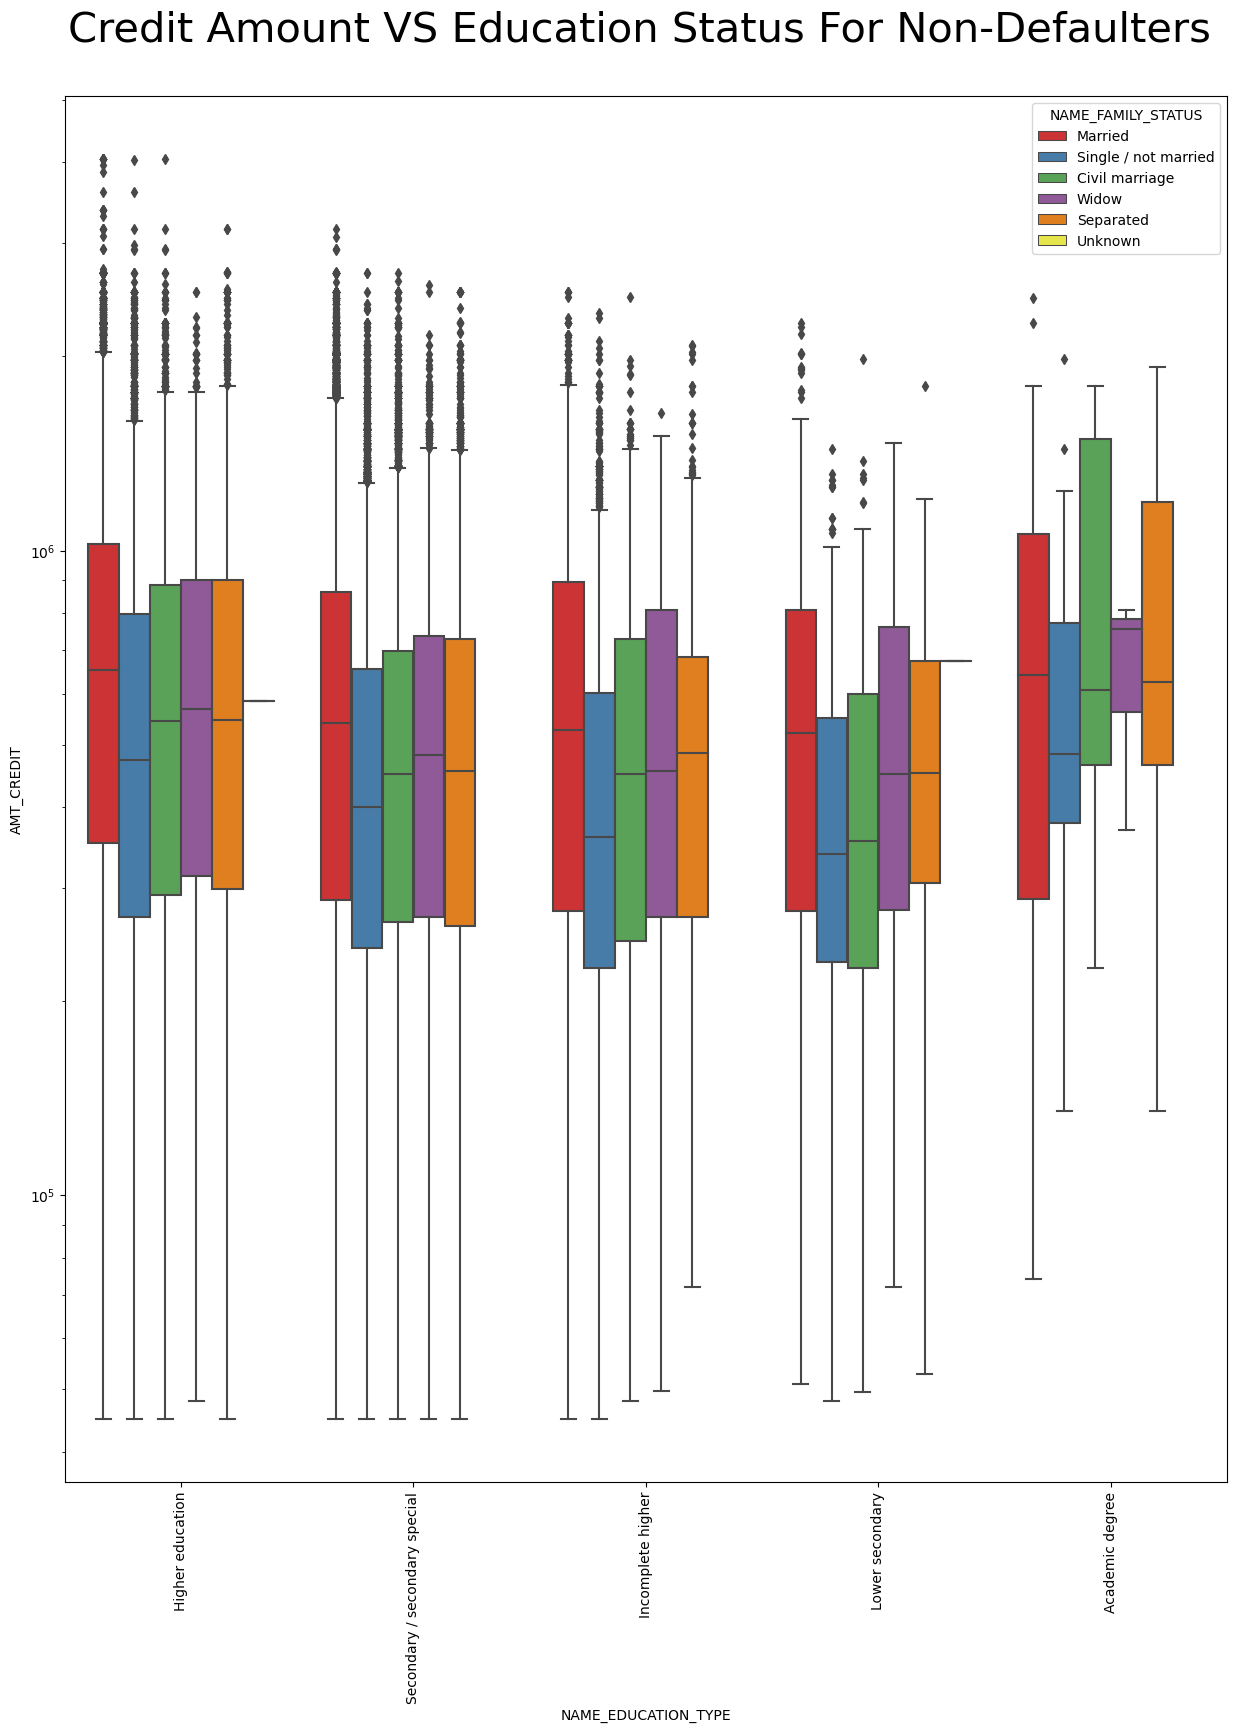

In [58]:
plt.figure(figsize=[15,18])
sns.boxplot(data = target0 ,  x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT', hue= 'NAME_FAMILY_STATUS' ,palette = 'Set1')
plt.title('Credit Amount VS Education Status For Non-Defaulters \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) Here we can conclude that in Academic Degree, Family Status of Civil Marriage , Married and Seperated have Higher No of Credit Amount then Others.
#### 2) Here also we can see that there are some Outliers Present

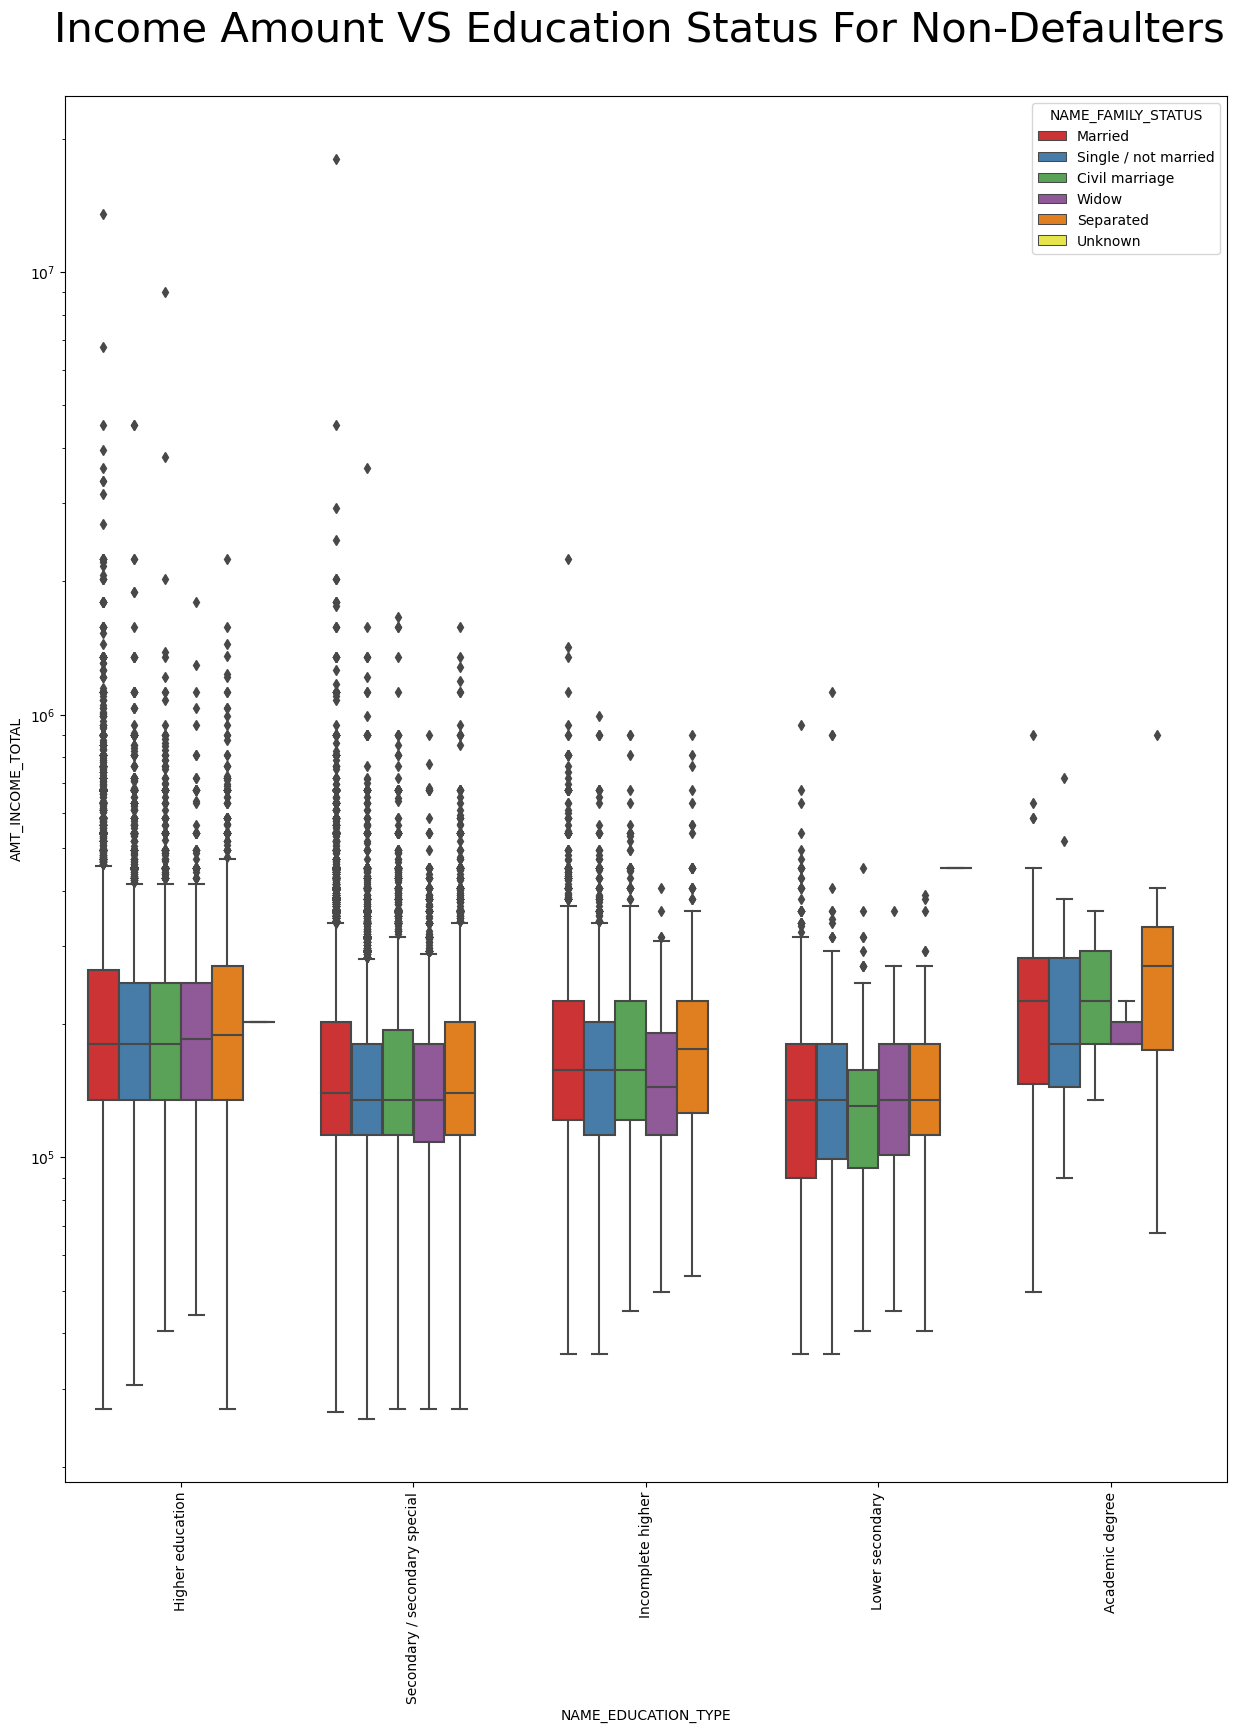

In [73]:
plt.figure(figsize=[15,18])
sns.boxplot(data = target0 ,  x = 'NAME_EDUCATION_TYPE' , y = 'AMT_INCOME_TOTAL', hue= 'NAME_FAMILY_STATUS' ,palette = 'Set1')
plt.title('Income Amount VS Education Status For Non-Defaulters \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) Here we can conclude that in Academic Degree, Family Status of Civil Marriage , Married and Seperated have Higher Income then Others.
#### 2) Here we can conclude that in Lower Secondary, Family Status of Civil Marriage have Low Income then Others.
#### 2) Here also we can see that there are some Outliers Present

## (2) For Defaulter People

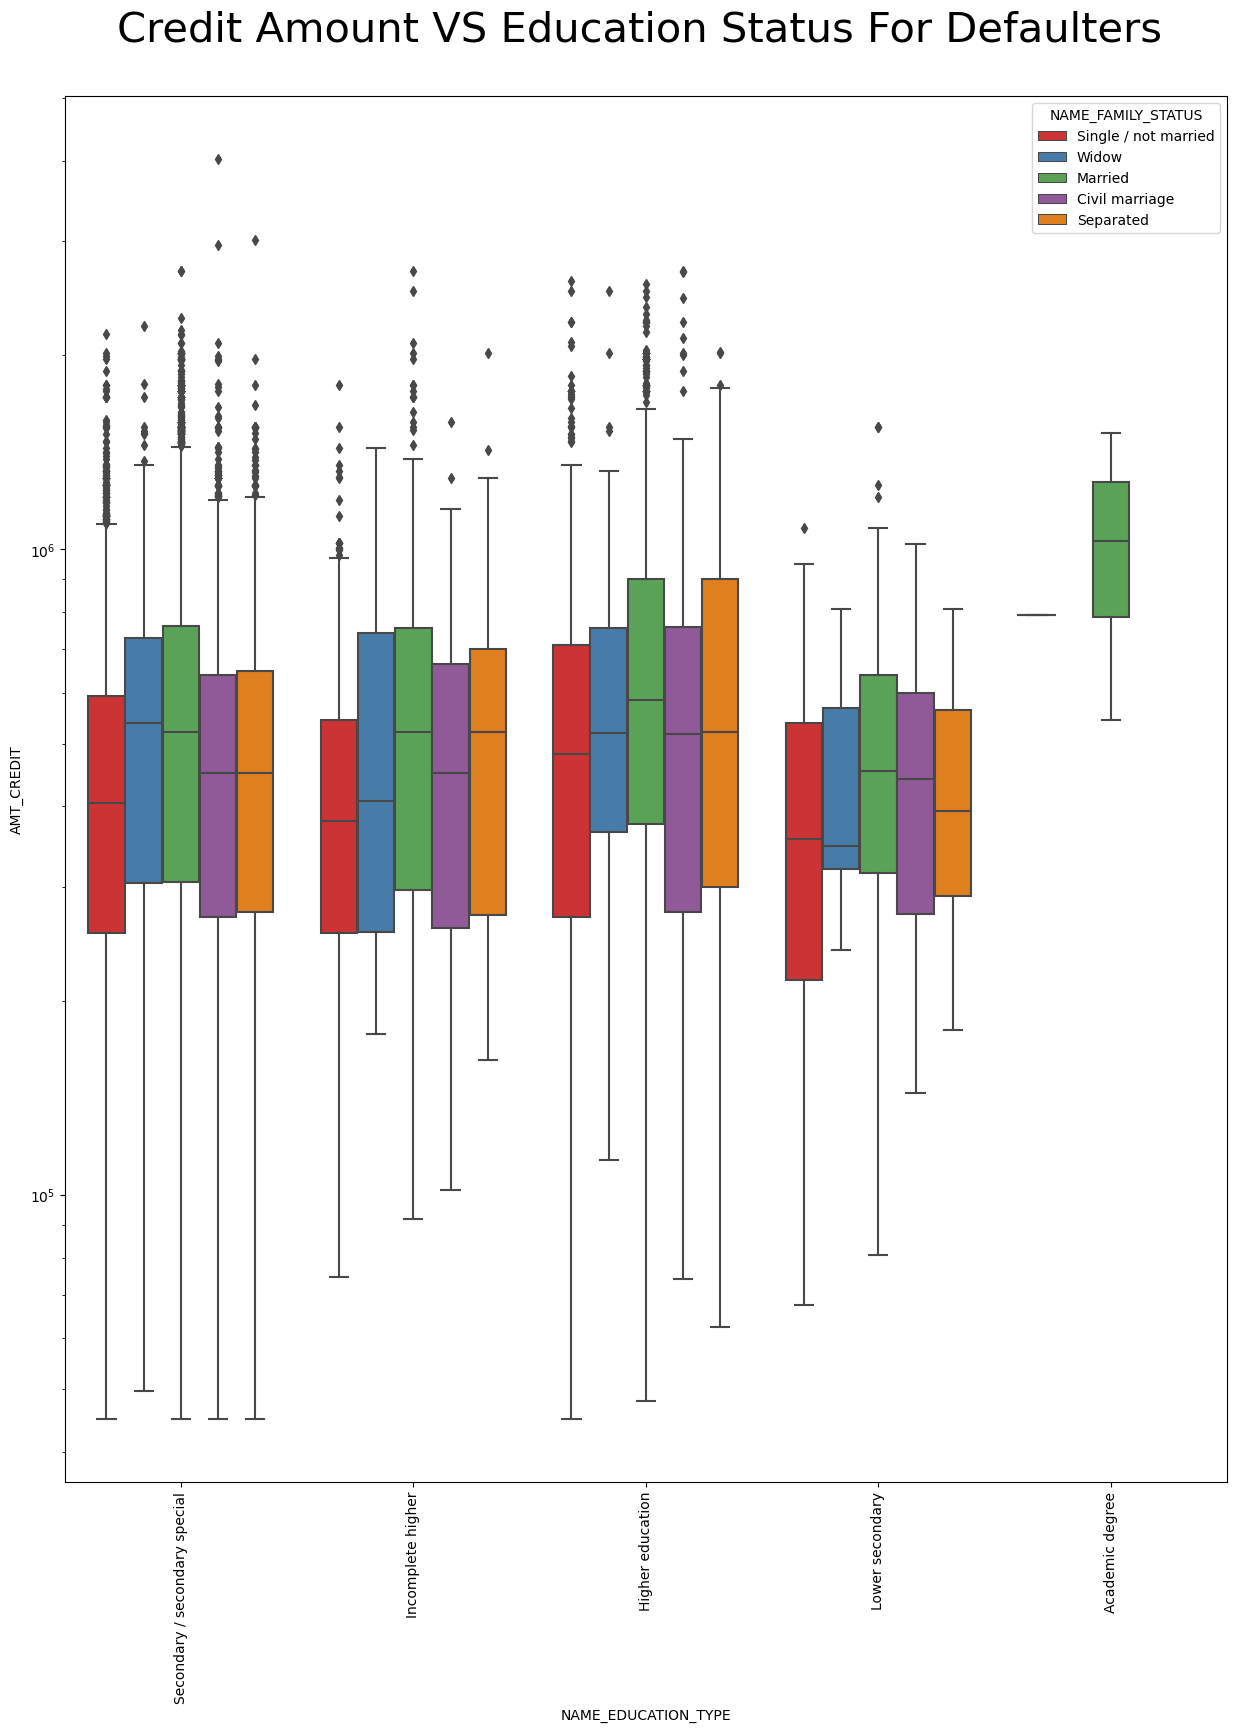

In [60]:
plt.figure(figsize=[15,18])
sns.boxplot(data = target1 ,  x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT', hue= 'NAME_FAMILY_STATUS' ,palette = 'Set1')
plt.title('Credit Amount VS Education Status For Defaulters \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) Here we can conclude that in Academic Degree, Family Status of Civil Marriage , Married and Seperated have Higher No of Credit Amount then Others.
#### 2) Here also we can see that there are some Outliers Present

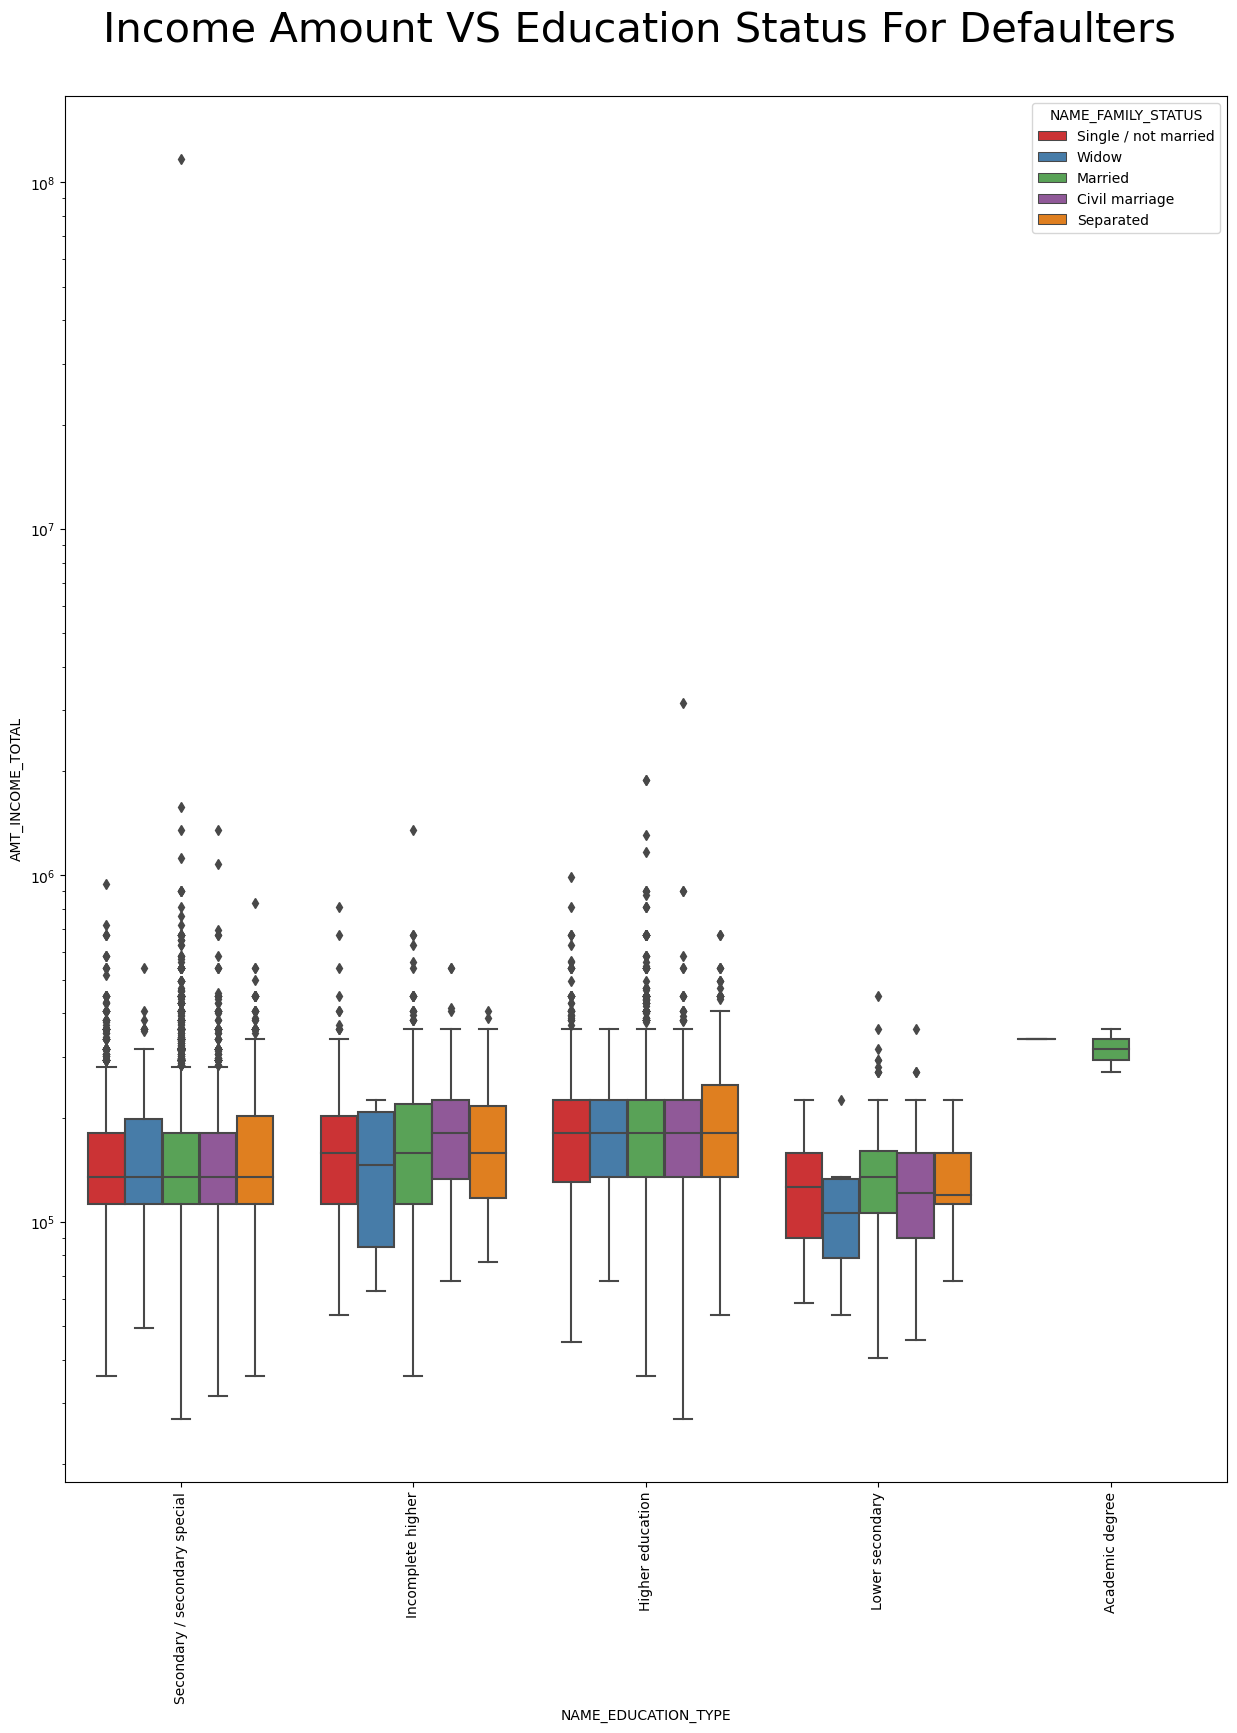

In [74]:
plt.figure(figsize=[15,18])
sns.boxplot(data = target1 ,  x = 'NAME_EDUCATION_TYPE' , y = 'AMT_INCOME_TOTAL', hue= 'NAME_FAMILY_STATUS' ,palette = 'Set1')
plt.title('Income Amount VS Education Status For Defaulters \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

#### 1) Here we can conclude that in Academic Degree, Family Status of Civil Marriage , Married and Seperated have Higher Income then Others.
#### 2) Here we can conclude that in Lower Secondary have Low Income then Others.
#### 2) Here also we can see that there are some Outliers Present

# ⮞   DATA 2 UNDERSTANDING AND CLEANING

In [62]:
data2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [63]:
data2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [64]:
# viewing %of null values
P2 = round((100*data2.isna().sum()/len(data2)) , 2)
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
P2 = P2[P2<=20]
P2

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

### Checking NAME_CASH_LOAN_PURPOSE coloumn 

In [65]:
data2.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [66]:
# Here XNA and XAP have Unknown Columns since the values are very high we have to Drop it
data2 = data2.drop(data2[data2['NAME_CASH_LOAN_PURPOSE'] == 'XAP'].index)
data2 = data2.drop(data2[data2['NAME_CASH_LOAN_PURPOSE'] == 'XNA'].index)
data2.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

# ⮞ Merging Data1 & Data2 for Analysis

In [67]:
data3 = pd.merge(left=data1 , right=data2 , how='inner' , on = 'SK_ID_CURR' , suffixes='_x')
data3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,-10341,-1010,-4799,-3015,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,-599.0,1,0,0,0,0,1,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-15280,-2668,-5266,-3787,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,-1634.0,0,0,0,1,0,5,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11694,-2060,-3557,-3557,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,1,1,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,-540.0,0,0,0,1,0,1,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,-540.0,0,0,0,1,0,1,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,MONDAY,15,Y,1,NaN,NaN,NaN,Repair

In [68]:
data3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_',
       'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE_',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_',
       'HOUR_APPR_PROCESS_START_', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CRE

In [69]:
# Dropping some Columns
data3.drop(['SK_ID_CURR' , 'REG_CITY_NOT_LIVE_CITY' , 'REG_CITY_NOT_WORK_CITY' , 'LIVE_REGION_NOT_WORK_REGION' , 'HOUR_APPR_PROCESS_START_' , 'WEEKDAY_APPR_PROCESS_START_'] , axis=1 , inplace=True)

In [70]:
# Changing x with _PREV
data3.columns = data3.columns.str.replace('x','_PREV')
data3.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_', 'AMT_ANNUITY_',
       'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE_', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT_PREV', 'AMT_DOWN_

# ⮞  Multivariate Analysis

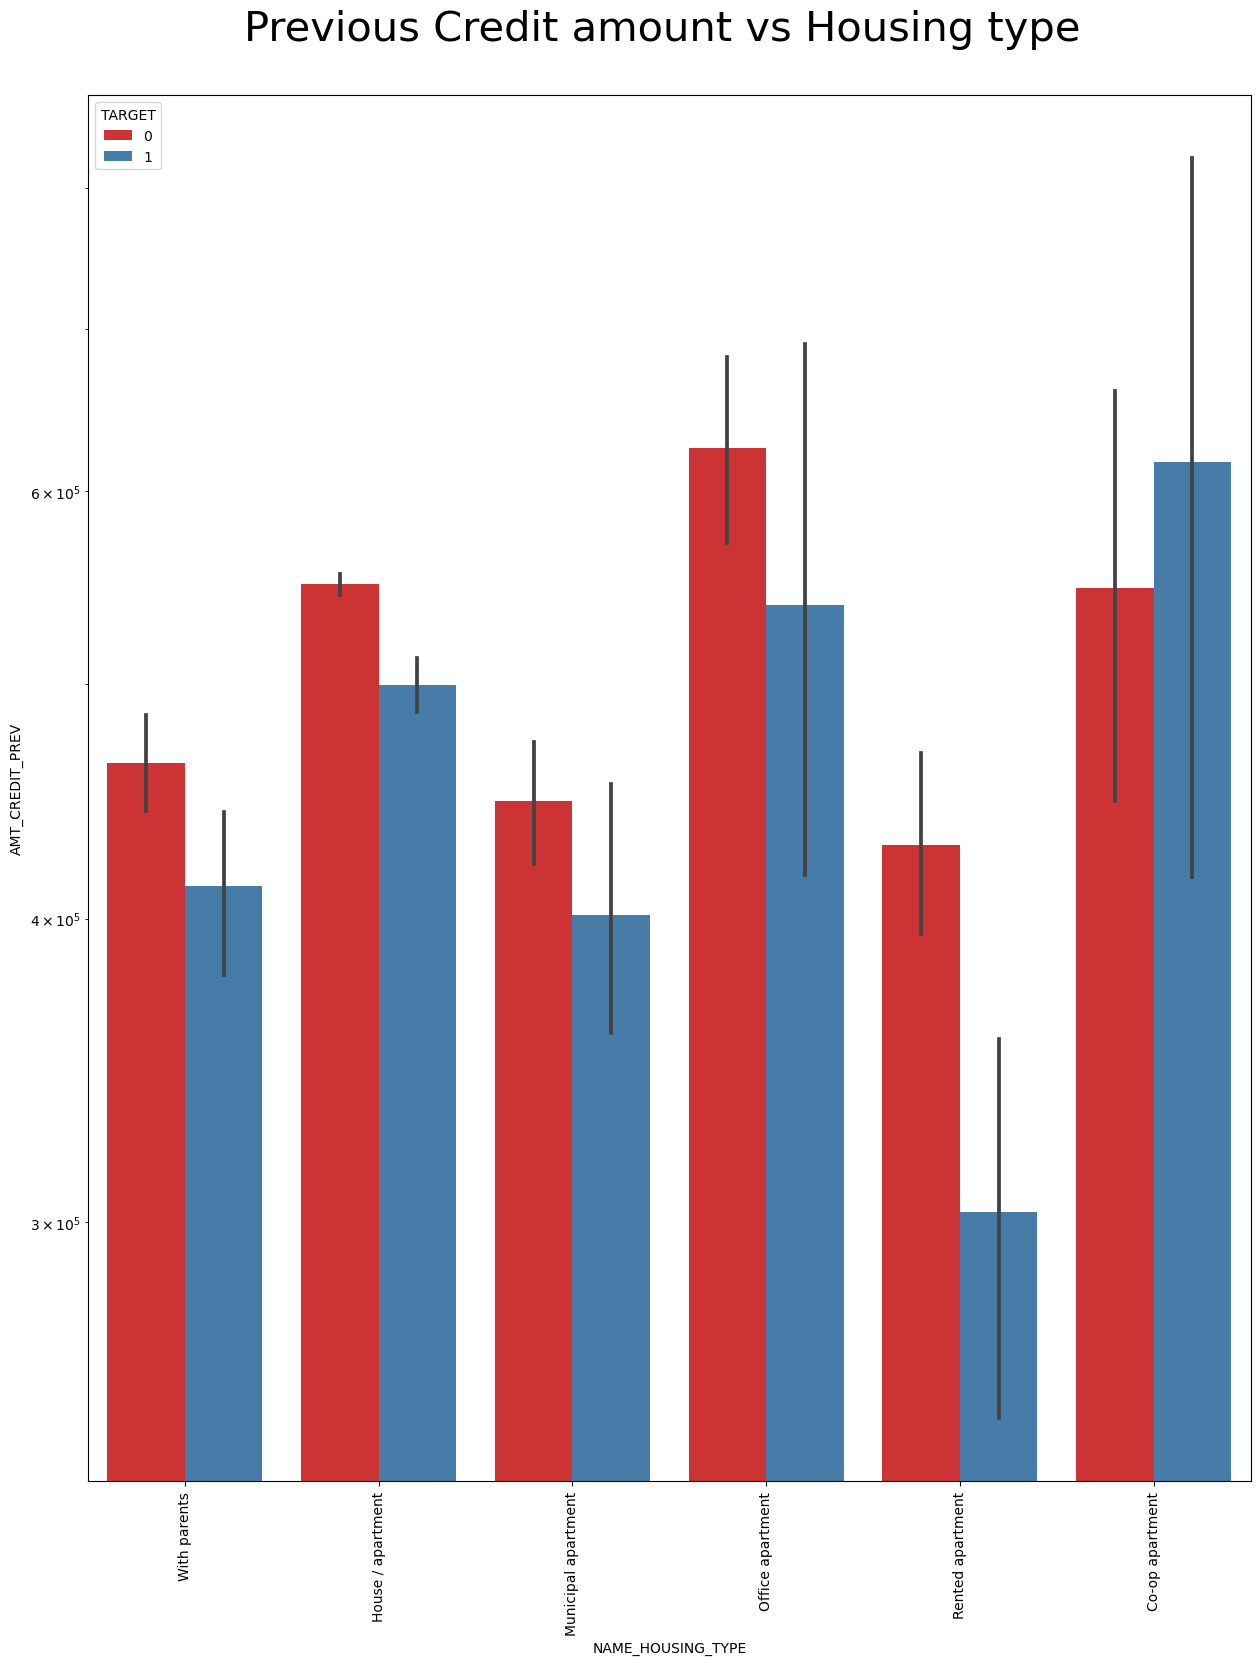

In [81]:
# Box plotting for Credit amount vs Housing type
plt.figure(figsize=[15,18])
sns.barplot(data = data3 ,  x = 'NAME_HOUSING_TYPE' , y = 'AMT_CREDIT_PREV', hue= 'TARGET' ,palette = 'Set1')
plt.title('Previous Credit amount vs Housing type \n', fontsize = 30)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

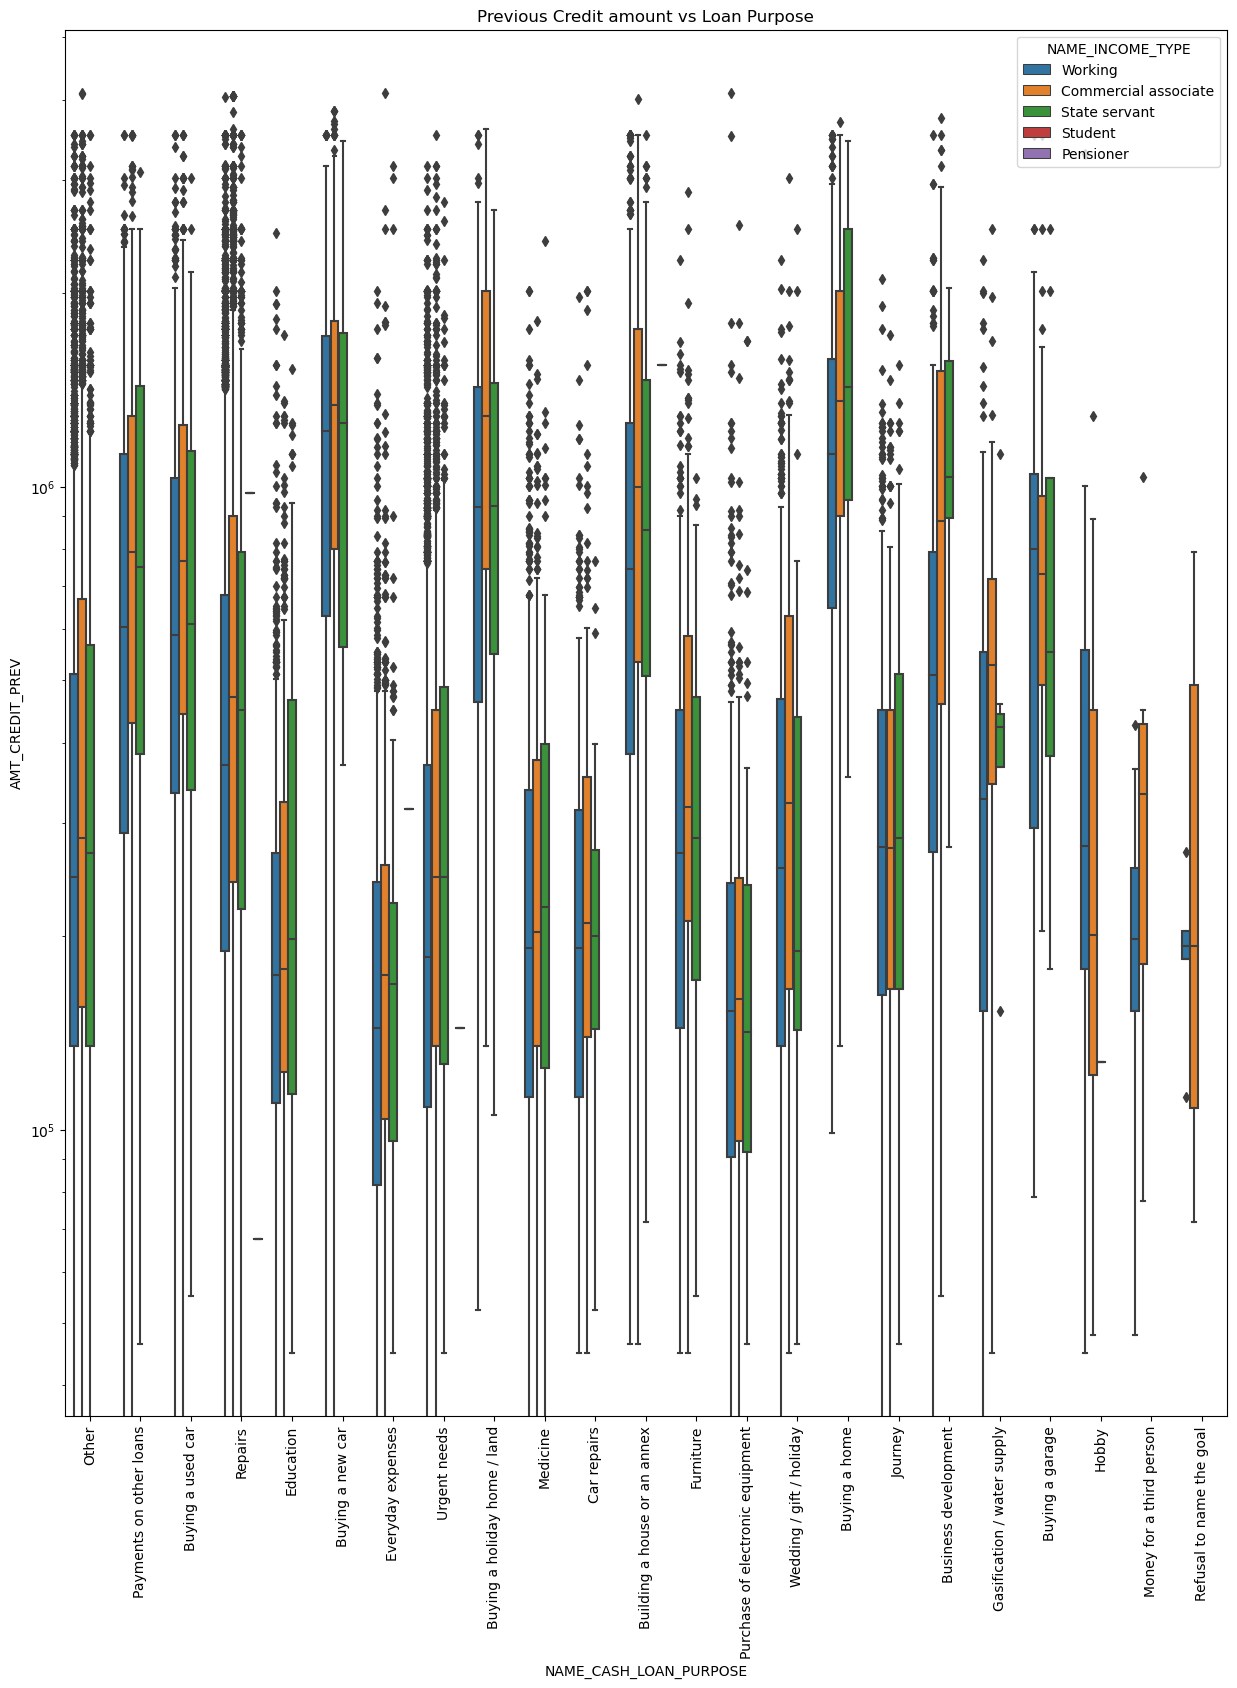

In [80]:
# Box plotting for Credit amount in logarithmic scale
plt.figure(figsize=(15,18))
sns.boxplot(data =data3, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Previous Credit amount vs Loan Purpose')
plt.show()

### CONCLUSION
1. Housing type 'With Parents' have least no of unsuccessful payments.

2. Repair is having higher number of unsuccessful payments.

3. Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.

4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.

5. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.